<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/IOD_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

Today I will attempt to predict whether or not an individual will suffer a stroke.

In [44]:
# @title Attribute Information
# id: unique identifier
# gender: "Male", "Female" or "Other"
# age: age of the patient
# hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# ever_married: "No" or "Yes"
# work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# Residence_type: "Rural" or "Urban"
# avg_glucose_level: average glucose level in blood
# bmi: body mass index
# smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
# stroke: 1 if the patient had a stroke or 0 if not
# Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Our Goals:
* Understand the distribution of the data
* Create a 50/50 sub-dataframe ratio of "Stroke" and "Non-Stroke" results (NearMiss Algorithm)
* Determine the Classifiers we are going to use and decide which one has a higher accuracy reflecting on what we've learnt so far in class
* Create a Neural Network and compare the accuracy to our best classifier
* Understand common mistakes made with imbalanced datasets

In [45]:
# @title Steps Taken
# The Process:
## I. Understanding our Data
# Data Overview: Explore basic statistics, data types, missing values, and unique values for each column.
# Data Visualisation: Create visualisations (e.g., histograms, box plots, scatter plots) to understand the distribution and relationships between different features.

## II. Preprocessing
# Feature Scaling: Apply feature scaling (e.g., StandardScaler, MinMaxScaler) to ensure all features are on the same scale.
# Data Distribution: Check the class distribution to identify any class imbalance issues.
# Data Splitting: Split the data into training and testing sets to prepare for model evaluation.

## III. Random UnderSampling and Oversampling
# Class Imbalance Handling: Address class imbalance using random undersampling and random oversampling techniques.
# Correlation Analysis: Examine correlations between features and the target variable to identify important features.
# Anomaly Detection: Explore outlier detection methods to identify potential anomalies in the dataset.
# Dimensionality Reduction and Clustering (t-SNE): Apply t-SNE for visualisation and cluster analysis to better understand the data distribution.
# Classifier Evaluation: Evaluate different classifiers (e.g., Decision Tree, Random Forest, SVM, XGBoost) on the imbalanced data.
# A Deeper Look into Logistic Regression: Explore the logistic regression model and its performance on the imbalanced data.
# Oversampling with SMOTE: Apply Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance.

## IV. Testing
# Testing with Logistic Regression: Evaluate the logistic regression model's performance on the test set.
# Neural Networks Testing (Undersampling vs. Oversampling): Compare neural networks trained on the undersampled and oversampled data to observe the impact of different data handling techniques.

## V. Hyperparameter Tuning and Model Optimization
# Hyperparameter Tuning: Fine-tune hyperparameters for different classifiers using techniques like Grid Search or Random Search.
# Model Ensembling and Stacking: Implement ensemble methods (e.g., Voting Classifier, Stacking) to combine multiple classifiers for improved performance.
# Gradient Boosting (e.g., CatBoost, XGBoost): Utilise gradient boosting techniques for better predictive power.
# Feature Importance: Analyse feature importance from ensemble models to understand the most influential features.

## VI. Encoding Categorical Features
# Encode Categorical Variables: Convert categorical variables into numeric format suitable for machine learning models (e.g., one-hot encoding, label encoding).

## VII. Final Model Selection and Evaluation
# Model Comparison: Compare the performance of different models after hyperparameter tuning and encoding.
# Cross-Validation: Perform k-fold cross-validation to obtain more robust estimates of model performance.
# Evaluation Metrics: Assess the models using various evaluation metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

## VIII. Conclusion
# Summary: Summarize the findings from different experiments and analyses.
# Recommendations: Provide insights and recommendations for selecting the best model for the specific problem at hand.
# Future Work: Suggest potential areas for further improvement or additional experimentation.

In [46]:
# @title Correcting Previous Mistakes from Imbalanced Datasets:

## Avoid using simple accuracy as the evaluation metric:** Accuracy can be misleading in the context of imbalanced datasets. Instead, prioritize using evaluation metrics appropriate for imbalanced data, such as F1-score, precision, recall, AUC-ROC, and AUC-PR.
## Be cautious with sampling techniques:** Use oversampling and undersampling techniques judiciously. Oversampling can lead to overfitting, while undersampling may result in the loss of valuable information from the majority class. Consider using advanced techniques like SMOTE or ADASYN for synthetic minority class generation.
## Avoid testing on the original imbalanced dataset:** Always split the dataset into training and testing sets before applying any resampling techniques. Testing on oversampled or undersampled data may yield overly optimistic results and obscure the model's true performance on unseen data.
## Take class distribution into account during cross-validation:** Ensure that each cross-validation fold maintains the original class distribution. Avoid resampling the entire dataset before cross-validation to prevent data leakage and inflated performance metrics. Apply sampling techniques only to the training folds while leaving the validation fold untouched.
## Choose appropriate model evaluation techniques:** Use stratified sampling and stratified cross-validation when dealing with imbalanced datasets. These techniques maintain the class distribution in each fold, providing a more reliable estimate of model performance.
## Don't ignore other data preprocessing steps:** Class imbalance handling is just one part of data preprocessing. Pay equal attention to other critical steps like missing value imputation, feature scaling, and encoding categorical variables. Proper preprocessing can significantly impact model performance.
## Avoid focusing solely on the minority class:** While addressing the minority class is crucial, do not neglect the majority class. Overemphasising the minority class may lead to biased models that perform poorly on the majority class.
## Keep track of data changes and decisions:** Document all steps taken to handle class imbalance and any resampling techniques applied. Maintaining a clear record of the data preprocessing pipeline ensures reproducibility and a deeper understanding of the model-building process.

# References:
1. Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2022 Aurélien Géron
2. Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn by Coding-Maniac
3. auprc, 5-fold c-v, and resampling methods by Jeremy Lane (Kaggle Notebook)
4. Credit Fraud || Dealing with Imbalanced Datasets by Janio Martinez Bachmann (Kaggle Notebook)
5. Predicting a Stroke (SHAP, LIME Explainer & ELI5) by Joshua Swords (Kaggle Notebook)

# Gather Sense of Our Data:
The first thing we must do is gather a basic sense of our data.

## Interpreting the skewness values:
* id: Skewness of approximately -0.0199 indicates a slight negative skewness. This means that the distribution is slightly shifted to the left, with the left tail being slightly longer than the right tail.
* age: Skewness of approximately -0.1371 also indicates a slight negative skewness. The age distribution is slightly shifted to the left.
* hypertension: Skewness of approximately 2.7154 indicates significant positive skewness. The distribution is heavily shifted to the right, suggesting that there might be a higher concentration of lower values and a long tail of higher values.
* heart_disease: Skewness of approximately 3.9472 indicates substantial positive skewness. The distribution is heavily right-skewed, indicating a significant concentration of lower values and a long tail of higher values.
* avg_glucose_level: Skewness of approximately 1.5723 indicates positive skewness. The distribution is shifted to the right, with a concentration of lower values and a long tail of higher values.
* bmi: Skewness of approximately 1.0882 indicates positive skewness. The distribution is slightly right-skewed, suggesting a concentration of lower values and a long tail of higher values.
* stroke: Skewness of approximately 4.1933 indicates significant positive skewness. The distribution is heavily right-skewed, implying a concentration of lower values and a long tail of higher values.

## In summary:
* Columns with negative skewness have their tails extending towards the lower values, while positive skewness indicates tails extending towards higher values.
* Higher absolute skewness values indicate stronger deviations from a symmetrical distribution.
* Large positive or negative skewness values indicate that the distribution is heavily shifted to one side.

In [47]:
# @title Libraries
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [48]:
# @title Call dataset
# Call dataset
dataset = 'healthcare-dataset-stroke-data.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset)

In [49]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [51]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [52]:
df.shape

(5110, 12)

In [53]:
# 201 Null values!
df.isnull().sum().max()

201

In [54]:
# @title Handling missing values
# In our dataset with 5110 records and 201 null values (missing values), the null values are all related to patients' BMI results.
# Replacing null values in a dataset is crucial because missing data can adversely affect the performance of machine learning models.

## Reasons for replacing null values:
# Avoid Biased Analysis: Having missing values for a specific feature, such as BMI, can introduce bias in data analysis. Since the null values are all against patients' BMI, any analysis involving BMI would be incomplete and biased without imputing these missing values.
# Prevent Model Errors: Many machine learning algorithms cannot handle missing values directly. Leaving missing values as is may lead to errors or even complete failure of the model training process.
# Completeness of Data: A complete dataset allows for a more comprehensive analysis. Imputing missing values ensures that all available information is utilized, leading to more robust and reliable models.

In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

DT_bmi_pipe = Pipeline(steps=[('scale', StandardScaler()),
                              ('lr', DecisionTreeRegressor(random_state=42))])

X = df[['age', 'gender', 'bmi']].copy()
X.gender = X.gender.replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(np.uint8)

# Separate rows with missing 'bmi' values and rows with non-missing 'bmi' values
Missing = X[X.bmi.isna()]
NotMissing = X[~X.bmi.isna()]

# Fit the pipeline with the rows that have non-missing 'bmi' values
Y = NotMissing.pop('bmi')
DT_bmi_pipe.fit(NotMissing[['age', 'gender']], Y)

# Check if there are any missing values in the 'bmi' column
if not Missing.empty:
    # Predict the missing 'bmi' values
    predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age', 'gender']]), index=Missing.index)
    df.loc[Missing.index, 'bmi'] = predicted_bmi


In [57]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


Now all the missing values have been populated.

And we'll progress into assessing basic questions like: Does age makes one more likely to suffer a stroke? What about gender? Or BMI?

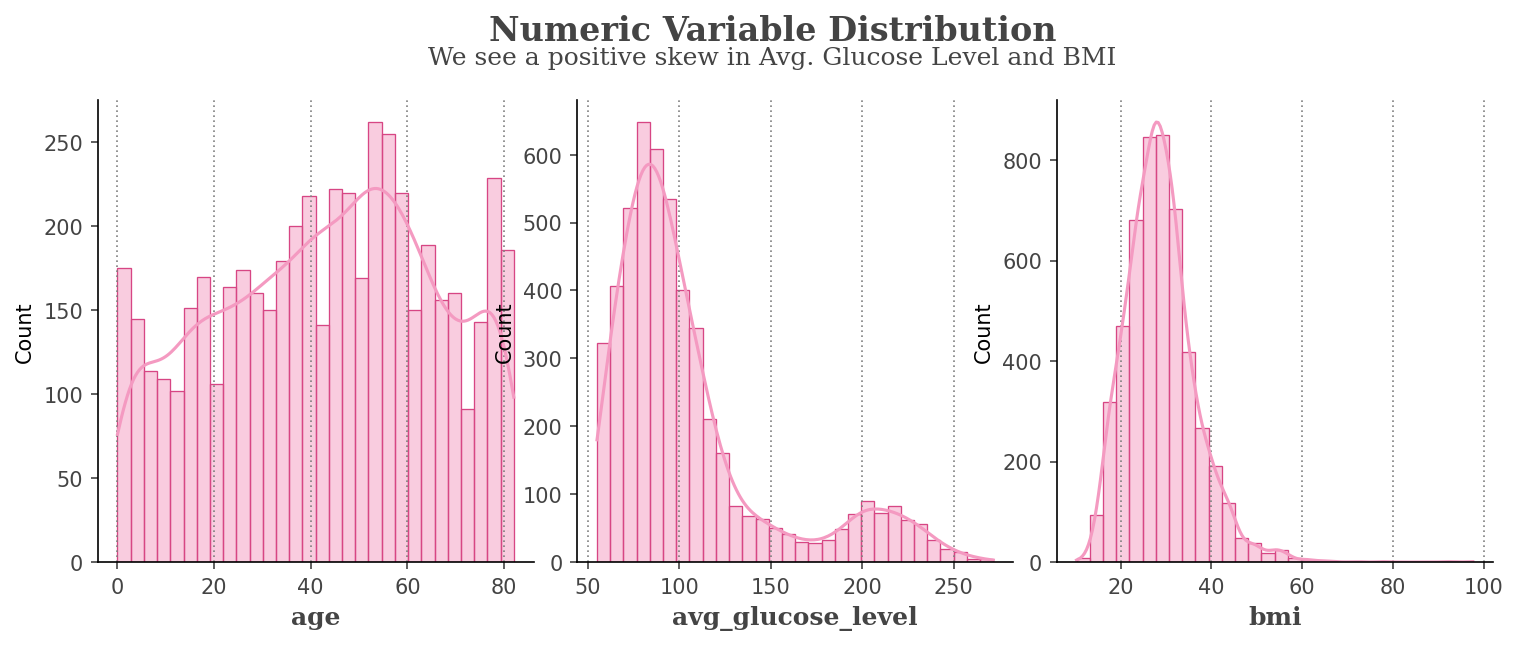

In [58]:
background_color = "white"
pink_pastel = "#f49ac1"
dark_pink = "#d74684"
text_color = "#444444"

# Create the figure and gridspec
fig = plt.figure(figsize=(12, 4), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(1, 3)
gs.update(wspace=0.1, hspace=0.4)

conts = ['age', 'avg_glucose_level', 'bmi']  # List of continuous variables to plot

for i, variable in enumerate(conts):
    ax = fig.add_subplot(gs[0, i])
    sns.histplot(df[variable], kde=True, color=pink_pastel, edgecolor=dark_pink, fill=True, bins=30, ax=ax)
    ax.set_xlabel(variable, fontsize=12, fontfamily='serif', color=text_color, fontweight='bold')
    ax.tick_params(axis='both', colors=text_color)
    ax.grid(axis='x', color='gray', linestyle=':', dashes=(1, 2))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Shared title and description for numeric variable distribution
title = 'Numeric Variable Distribution'
description = 'We see a positive skew in Avg. Glucose Level and BMI'
bbox_props = dict(boxstyle="round,pad=0.2", fc=background_color, ec="none", lw=0)

fig.text(0.5, 0.98, title, fontsize=16, fontweight='bold', fontfamily='serif', color=text_color, ha='center')
fig.text(0.5, 0.94, description, fontsize=12, fontweight='light', fontfamily='serif', color=text_color, ha='center', bbox=bbox_props)

plt.tight_layout()
plt.show()

In [59]:
# Check summary statistics to get an overview of the data distribution
print(df[conts].describe())

               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.918410
std      22.612647          45.283560     7.731841
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.700000
50%      45.000000          91.885000    28.300000
75%      61.000000         114.090000    32.900000
max      82.000000         271.740000    97.600000


In [60]:
# Calculate skewness and kurtosis to measure data asymmetry and tail thickness
skewness = df[conts].skew()
kurtosis = df[conts].kurtosis()
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.047423
dtype: float64
Kurtosis: age                 -0.991010
avg_glucose_level    1.680479
bmi                  3.504624
dtype: float64


In [61]:
# Calculate the Interquartile Range (IQR) to identify potential outliers
Q1 = df[conts].quantile(0.25)
Q3 = df[conts].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for Continuous Variables:")
print(IQR)

Interquartile Range (IQR) for Continuous Variables:
age                  36.000
avg_glucose_level    36.845
bmi                   9.200
dtype: float64


In [62]:
# Identify extreme values (outliers) using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = {}
for variable in conts:
    outliers[variable] = df[(df[variable] < lower_bound[variable]) | (df[variable] > upper_bound[variable])]

# Print the outliers for each continuous variable
for variable, outlier_df in outliers.items():
    print(f"Outliers for {variable}:")
    print(outlier_df[[variable]])
    print()

Outliers for age:
Empty DataFrame
Columns: [age]
Index: []

Outliers for avg_glucose_level:
      avg_glucose_level
0                228.69
1                202.21
3                171.23
4                174.12
5                186.21
...                 ...
5061             223.78
5062             211.58
5063             179.38
5064             193.88
5076             174.37

[627 rows x 1 columns]

Outliers for bmi:
       bmi
21    48.9
66    47.5
113   56.6
254   50.1
258   54.6
...    ...
4906  54.1
4952  56.6
5009  49.5
5057  47.6
5103  46.9

[120 rows x 1 columns]



In [63]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for stroke and no-stroke groups
stroke_data = df[df['stroke'] == 1]
no_stroke_data = df[df['stroke'] == 0]

# Calculate summary statistics for age, avg_glucose_level, and bmi for each group
summary_stats = pd.DataFrame({
    'Mean (Stroke)': stroke_data[conts].mean(),
    'Mean (No Stroke)': no_stroke_data[conts].mean(),
    'Median (Stroke)': stroke_data[conts].median(),
    'Median (No Stroke)': no_stroke_data[conts].median(),
    'Standard Deviation (Stroke)': stroke_data[conts].std(),
    'Standard Deviation (No Stroke)': no_stroke_data[conts].std(),
})

print(summary_stats)

# Perform t-test to compare the means of stroke and no-stroke groups
ttest_results = pd.DataFrame()
for feature in conts:
    t_stat, p_value = ttest_ind(stroke_data[feature], no_stroke_data[feature], equal_var=False)
    ttest_results.at[feature, 'T-Statistic'] = t_stat
    ttest_results.at[feature, 'P-Value'] = p_value

print("\nT-Test Results:")
print(ttest_results)


                   Mean (Stroke)  Mean (No Stroke)  Median (Stroke)  \
age                    67.728193         41.971545        71.000000   
avg_glucose_level     132.544739        104.795513       105.220000   
bmi                    30.336552         28.845767        29.817949   

                   Median (No Stroke)  Standard Deviation (Stroke)  \
age                             43.00                    12.727419   
avg_glucose_level               91.47                    61.921056   
bmi                             28.10                     5.885467   

                   Standard Deviation (No Stroke)  
age                                     22.291940  
avg_glucose_level                       43.846069  
bmi                                      7.808223  

T-Test Results:
                   T-Statistic       P-Value
age                  29.686266  2.115685e-95
avg_glucose_level     6.982412  2.401437e-11
bmi                   3.828144  1.577218e-04


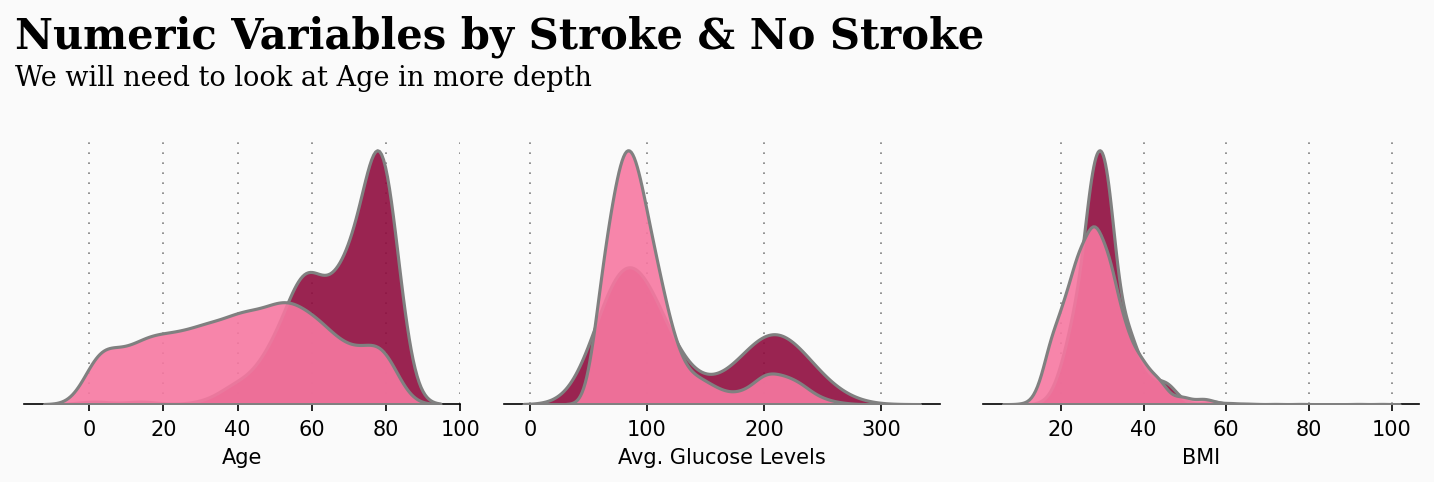

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

background_color = "#fafafa"
dark_gray = "#404040"
dark_pink = "#900C3F"
light_pink = "#f778a1"
gray = "gray"

fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color="#900C3F", shade=True, linewidth=1.5, ec="gray",alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color="#f778a1", shade=True, linewidth=1.5, ec="gray",alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'We will need to look at Age in more depth',
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

The summary statistics and t-test results show that there are clear differences in some health measurements between people who had a stroke and those who didn't:

* Age: People who had a stroke tend to be older on average (Mean of 67 years), while those who didn't have a stroke are relatively younger (Mean of 42 years).
* Average Blood Sugar Level: The average blood sugar level is higher in the group of people who had a stroke (Mean of 132.54) compared to those who didn't (Mean of 104.80).
* BMI (Body Mass Index): The BMI is also higher in the group of people who had a stroke (Mean of 30.34) compared to those who didn't (Mean of 28.85).

These findings suggest that age, blood sugar level, and BMI could be important factors in predicting the risk of stroke.

In [65]:
# Calculate the correlation between Age and BMI
age_bmi_corr = df['age'].corr(df['bmi'])

# Calculate the correlation between Age and Average Glucose Level
age_glucose_corr = df['age'].corr(df['avg_glucose_level'])

print(f"Correlation between Age and BMI: {age_bmi_corr:.2f}")
print(f"Correlation between Age and Average Glucose Level: {age_glucose_corr:.2f}")

Correlation between Age and BMI: 0.33
Correlation between Age and Average Glucose Level: 0.24


Within the correlation scale between -1 and 1, the relationship between age and bmi is 0.33.

Similarly, the correlation between age and average glucose level is 0.24.

This indicates weak positive relationships, showcasing that as a person's age increases, their bmi and avg glucose levels tend to increase slightly, but the relationship is not very strong.


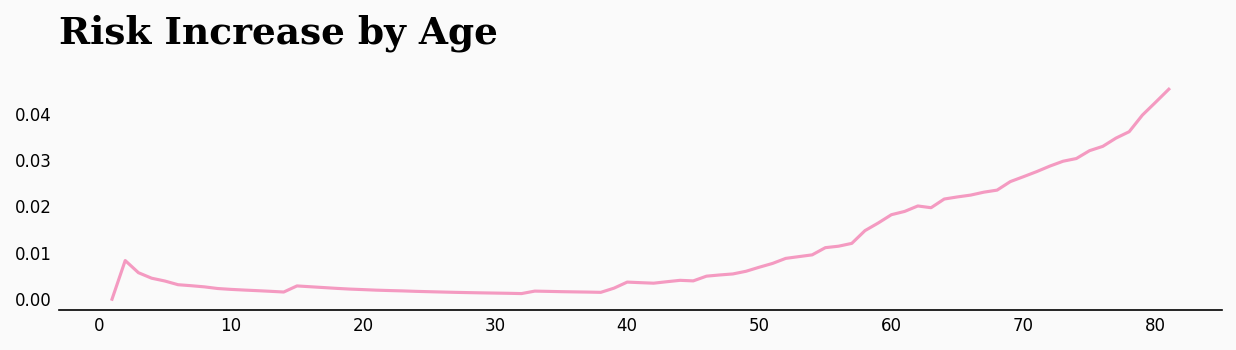

In [66]:
fig = plt.figure(figsize=(10, 5), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate, color=pink_pastel, ax=ax0)

for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both', length=0)

ax0.text(-3, 0.055, 'Risk Increase by Age', fontsize=18, fontfamily='serif', fontweight='bold')

plt.show()


The graph of the relationship between age and stroke likelihood seems to indicate that the older you get, the more at risk you get of having a stroke.

However, the y-axis has very low risk values. This is because the dataset is highly imbalanced.

Only 249 strokes are in our dataset which totals 5000 - around 1 in 20.

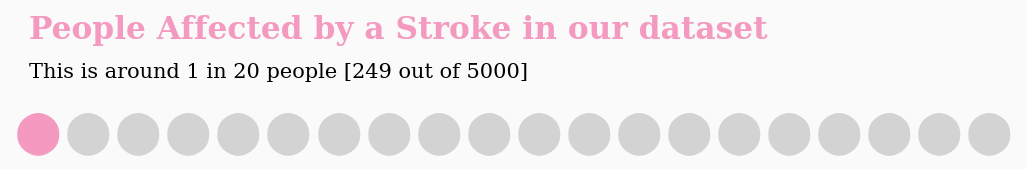

In [67]:
from pywaffle import Waffle

fig = plt.figure(figsize=(7, 2), dpi=150, facecolor=background_color,
                 FigureClass=Waffle,
                 rows=1,
                 values=[1, 19],
                 colors=[pink_pastel, "lightgray"],
                 characters='⬤',
                 font_size=20,
                 vertical=True,
                 )

fig.text(0.035, 0.78, 'People Affected by a Stroke in our dataset', fontfamily='serif', fontsize=15, fontweight='bold', color=pink_pastel)
fig.text(0.035, 0.65, 'This is around 1 in 20 people [249 out of 5000]', fontfamily='serif', fontsize=10)

plt.show()

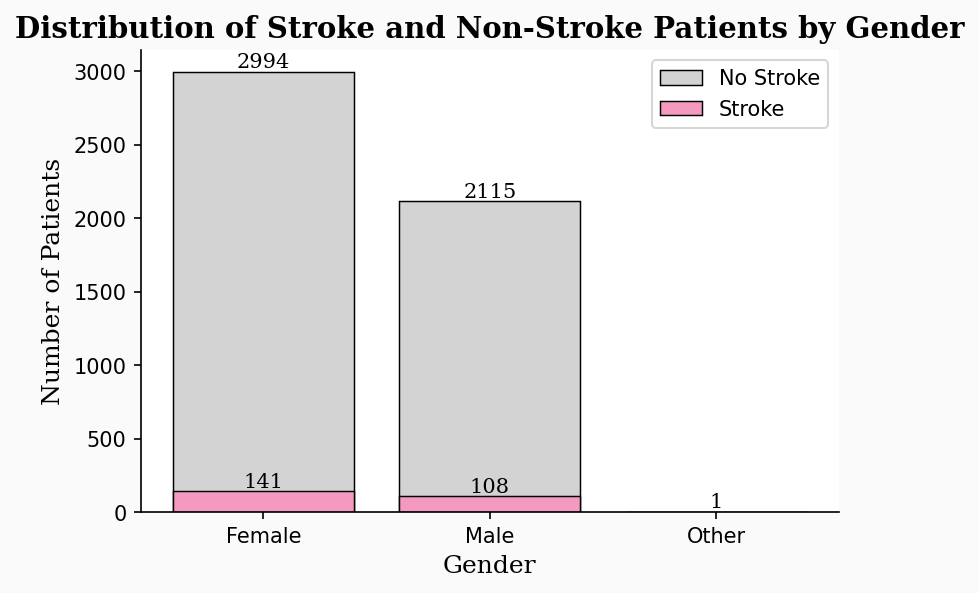

In [68]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()
stroke_counts = df[df['stroke'] == 1]['gender'].value_counts()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4), dpi=150, facecolor=background_color)

# Define colors for stroke and non-stroke bars
colors = ['#f49ac1', 'lightgray']

# Plot the bars for non-stroke patients
ax.bar(gender_counts.index, gender_counts, color=colors[1], edgecolor='black', linewidth=0.7, label='No Stroke')

# Plot the bars for stroke patients on top of the non-stroke bars
ax.bar(stroke_counts.index, stroke_counts, color=colors[0], edgecolor='black', linewidth=0.7, label='Stroke')

# Add labels and title
ax.set_xlabel('Gender', fontsize=12, fontfamily='serif', color='black')
ax.set_ylabel('Number of Patients', fontsize=12, fontfamily='serif', color='black')
ax.set_title('Distribution of Stroke and Non-Stroke Patients by Gender', fontsize=14, fontweight='bold', fontfamily='serif', color='black')

# Set the text color for numbers on top of bars to black
text_color = 'black'

# Remove the top and right spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Show the legend
ax.legend()

# Add numbers on top of each bar
for idx, count in enumerate(gender_counts):
    ax.text(idx, count, str(count), ha='center', va='bottom', fontsize=10, fontfamily='serif', color=text_color)

for idx, count in enumerate(stroke_counts):
    ax.text(idx, count, str(count), ha='center', va='bottom', fontsize=10, fontfamily='serif', color=text_color)

plt.show()


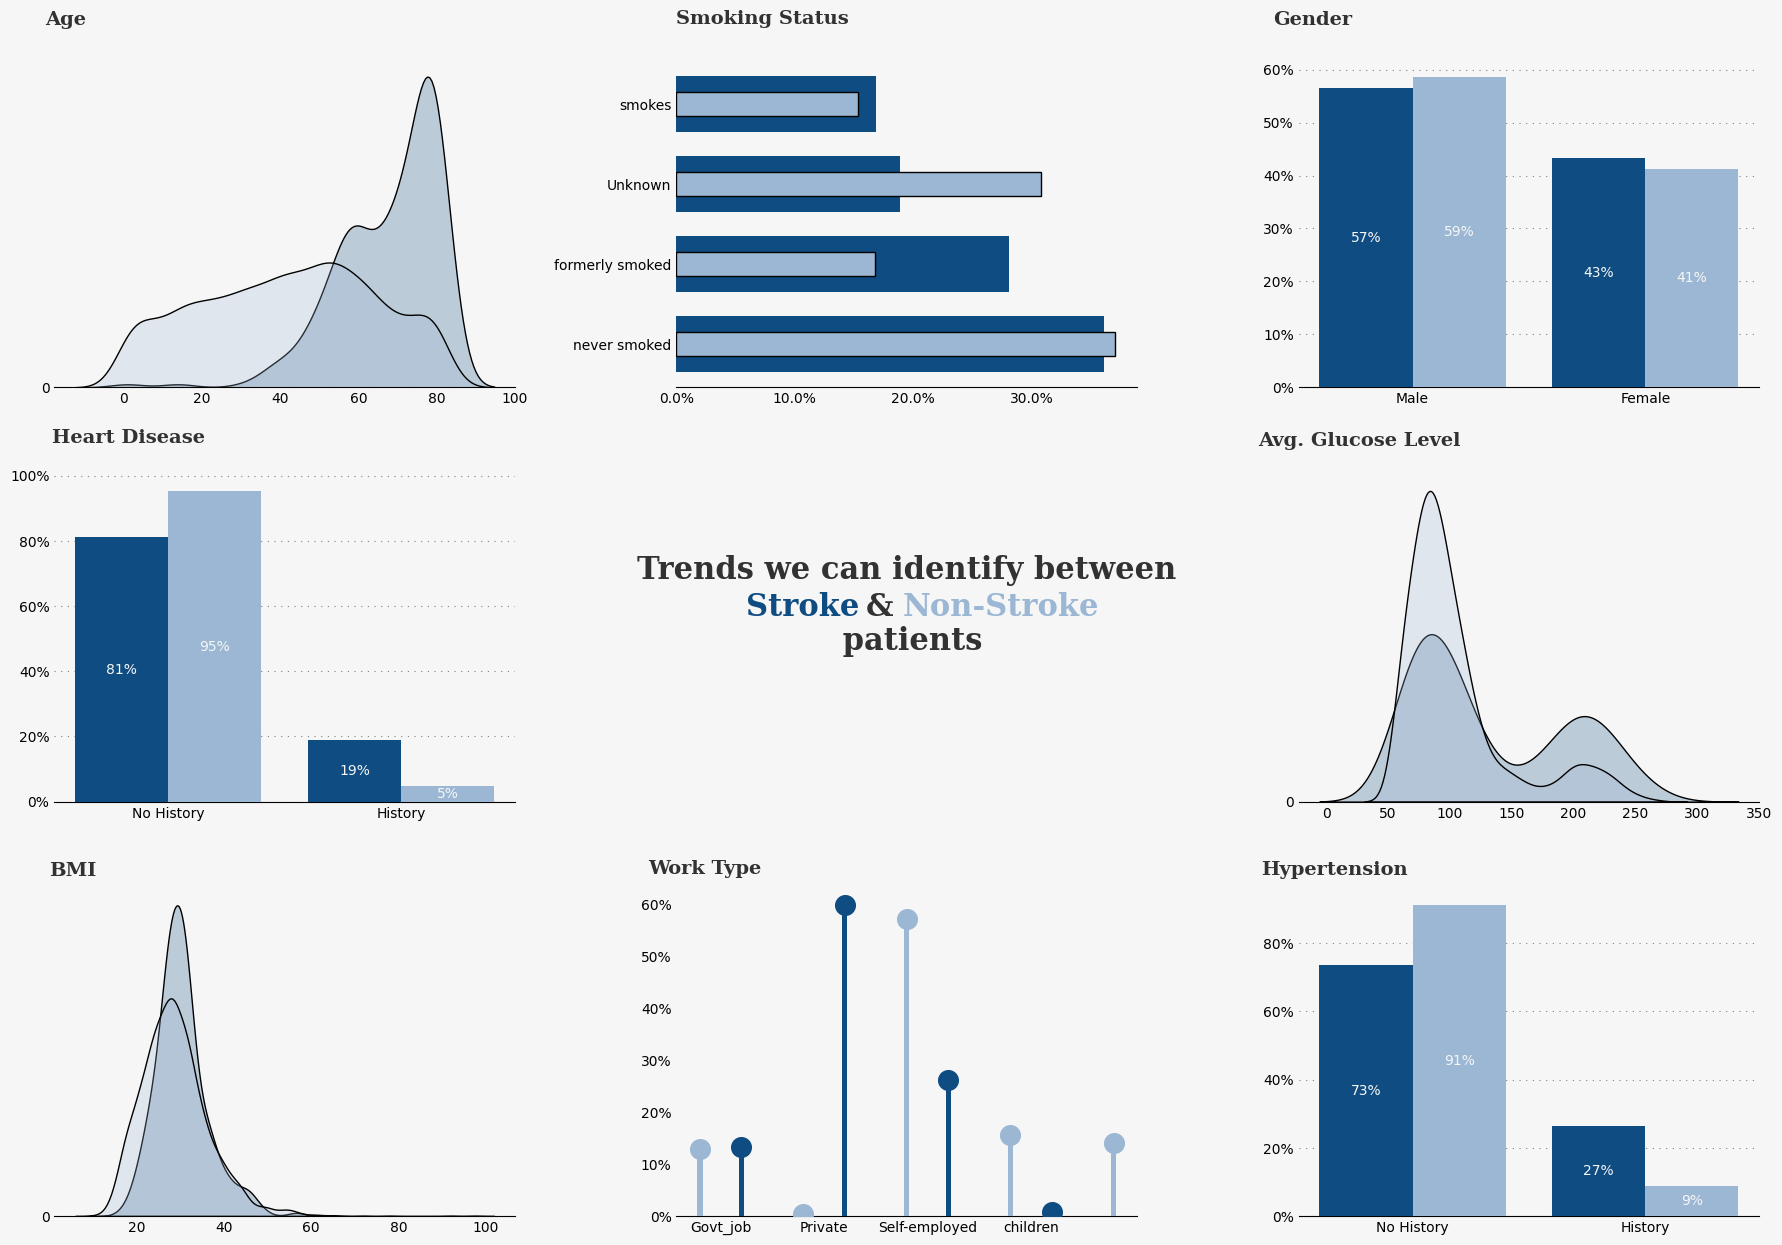

In [69]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

# Drop single 'Other' gender
no_str_only = no_str_only[(no_str_only['gender'] != 'Other')]

fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color


# Plots

## Age


ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["age"])
negative = pd.DataFrame(no_str_only["age"])
sns.kdeplot(positive["age"], ax=ax0,color="#0f4c81", shade=True, ec='black',label="positive")
sns.kdeplot(negative["age"], ax=ax0, color="#9bb7d4", shade=True, ec='black',label="negative")
#ax3.text(0.29, 13, 'Age',
 #        fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# Smoking
positive = pd.DataFrame(str_only["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_str_only["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')



# Heart Dis

positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Trends we can identify between\n\n patients',
         horizontalalignment='center', verticalalignment='center', fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15, 0.57, "Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41, 0.57, "&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49, 0.57, "Non-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')


# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["avg_glucose_level"])
negative = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5,color="#0f4c81",ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color="#9bb7d4", ec='black',shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level',
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')
ax5.set_xlabel('')



## BMI


ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(str_only["bmi"])
negative = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color="#9bb7d4",ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI',
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')
ax6.set_xlabel('')


# Work Type

positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# hypertension

positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# tidy up



for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color)


plt.show()


In [70]:
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [71]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


In [72]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [73]:
X_test.head(2)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31,0,0,1,64.85,23.0
4478,0,40,0,0,1,65.29,28.3


In [74]:
# Our data is biased, we can fix this with SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [75]:
# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])



#X = upsampled_df.iloc[:,:-1] # X_train_resh
#Y = upsampled_df.iloc[:,-1]# y_train_resh

#retain_x = X.sample(100)
#retain_y = Y.loc[X.index]

#X = X.drop(index=retain_x.index)
#Y = Y.drop(index=retain_x.index)

In [76]:
rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [77]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.940179060931756
SVM mean : 0.8847303657059443
Logistic Regression mean : 0.8350129551560386


In [78]:
rf_pipeline.fit(X_train_resh,y_train_resh)
svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)

#X = df.loc[:,X.columns]
#Y = df.loc[:,'stroke']

rf_pred   =rf_pipeline.predict(X_test)
svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [79]:
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)

Mean f1 scores:
RF mean : 0.16498993963782696
SVM mean : 0.15416238437821175
LR mean : 0.1902071563088512


In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Step 1: Data Preparation and Comment
# Scaling the numeric columns 'age', 'avg_glucose_level', and 'bmi'
# We want to scale these columns to bring them to a similar range as other features in the dataset.
scaler = StandardScaler()
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
df_median_scaled = df.copy()  # Create a copy of the DataFrame to work on
df_median_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Step 2: Data Sub-Sampling and Comment
# Creating a balanced sub-sample with an equal number of stroke and non-stroke cases
# Since we have an imbalance in the 'stroke' class, we will create a sub-sample to address this issue.
# Our sub-sample will contain an equal number of stroke and non-stroke cases to avoid overfitting and wrong correlations.
# The goal is to ensure our classification models can better understand patterns that determine whether a patient has a stroke or not.

# Separate the stroke and non-stroke cases
stroke_cases = df[df['stroke'] == 1]
non_stroke_cases = df[df['stroke'] == 0]

# Sample the non-stroke cases to have the same number as stroke cases
num_stroke_cases = stroke_cases.shape[0]
subsampled_non_stroke_cases = resample(non_stroke_cases, n_samples=num_stroke_cases, random_state=42)

# Concatenate the stroke and subsampled non-stroke cases to create the balanced sub-sample
balanced_subsample = pd.concat([stroke_cases, subsampled_non_stroke_cases])

# Step 3: Save the Data to a New Dataset
# Saving the scaled and balanced sub-sample to a new dataset
balanced_subsample.to_csv('dataset_stroke_balanced_subsample.csv', index=False)

In [81]:
df_scaled = pd.read_csv('dataset_stroke_balanced_subsample.csv')

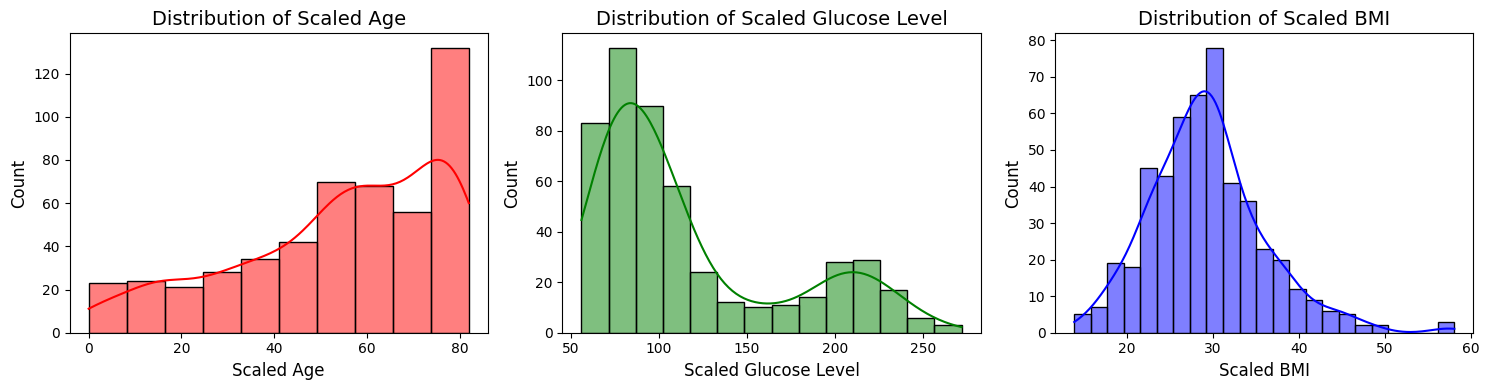

In [82]:
# Step 1: Visualise Scaled Columns
# Create subplots to visualize the scaled columns
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot the distribution of 'age'
sns.histplot(df_scaled['age'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Scaled Age', fontsize=14)
ax[0].set_xlabel('Scaled Age', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Plot the distribution of 'avg_glucose_level'
sns.histplot(df_scaled['avg_glucose_level'], ax=ax[1], color='g', kde=True)
ax[1].set_title('Distribution of Scaled Glucose Level', fontsize=14)
ax[1].set_xlabel('Scaled Glucose Level', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

# Plot the distribution of 'bmi'
sns.histplot(df_scaled['bmi'], ax=ax[2], color='b', kde=True)
ax[2].set_title('Distribution of Scaled BMI', fontsize=14)
ax[2].set_xlabel('Scaled BMI', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)

plt.tight_layout()  # Adjusts the spacing between subplots for better visualisation
plt.show()

## Splitting the Data (Original DataFrame)
* Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe.
* Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

# Random Under-Sampling:
In this phase of the project, we will implement "Random Under-Sampling," a technique to address class imbalance in our stroke dataset.

Class imbalance can lead to overfitting and biased model performance. Random Under-Sampling involves reducing the number of instances in the majority class (no stroke) to match the number of instances in the minority class (stroke).

This will result in a more balanced dataset and help our models avoid overfitting.

## Steps:
1. First, we need to determine the level of class imbalance in our dataset. We can use the value_counts() method on the 'stroke' column to count the number of stroke cases (label 1) and non-stroke cases (label 0).
Based on the number of stroke cases, we aim to bring the number of non-stroke cases to the same amount as stroke cases, creating a balanced ratio (e.g., 50/50).
2. After implementing this technique, we will have a sub-sample of our dataframe with a balanced class distribution.
3. To avoid potential bias during training, we will shuffle the data to ensure that our models can learn patterns without relying on the order of instances.

Let's proceed with the code implementation:

In [83]:
# Count the number of records with stroke equal to 1 ("Yes")
stroke_yes_count = df['stroke'].sum()

# Calculate the percentage of records with stroke equal to 1
percentage_stroke_yes = (stroke_yes_count / len(df)) * 100

print(f"Number of records with stroke: {stroke_yes_count}")
print(f"Percentage of records with stroke: {percentage_stroke_yes:.2f}%")

Number of records with stroke: 249
Percentage of records with stroke: 4.87%


In [85]:
# Step 1: Data Preparation
X = df.drop('stroke', axis=1)
y = df['stroke']

# Printing the percentage of stroke and non-stroke cases in the original dataset
print('No Stroke:', round(df['stroke'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print('Stroke:', round(df['stroke'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

# Step 2: Random Under-Sampling
# Separate stroke and non-stroke cases
stroke_cases = df[df['stroke'] == 1]
non_stroke_cases = df[df['stroke'] == 0]

# Sample the non-stroke cases to match the number of stroke cases
num_stroke_cases = len(stroke_cases)
subsampled_non_stroke_cases = resample(non_stroke_cases, n_samples=num_stroke_cases, random_state=42)

# Concatenate the stroke and subsampled non-stroke cases to create the balanced sub-sample
balanced_subsample = pd.concat([stroke_cases, subsampled_non_stroke_cases])

# Shuffle the rows in the balanced sub-sample
balanced_subsample = balanced_subsample.sample(frac=1, random_state=42)

# Printing the percentage of stroke and non-stroke cases in the balanced sub-sample
print('No Stroke (Balanced Sub-Sample):', round(balanced_subsample['stroke'].value_counts()[0] / len(balanced_subsample) * 100, 2), '% of the dataset')
print('Stroke (Balanced Sub-Sample):', round(balanced_subsample['stroke'].value_counts()[1] / len(balanced_subsample) * 100, 2), '% of the dataset')

No Stroke: 95.13 % of the dataset
Stroke: 4.87 % of the dataset
No Stroke (Balanced Sub-Sample): 50.0 % of the dataset
Stroke (Balanced Sub-Sample): 50.0 % of the dataset


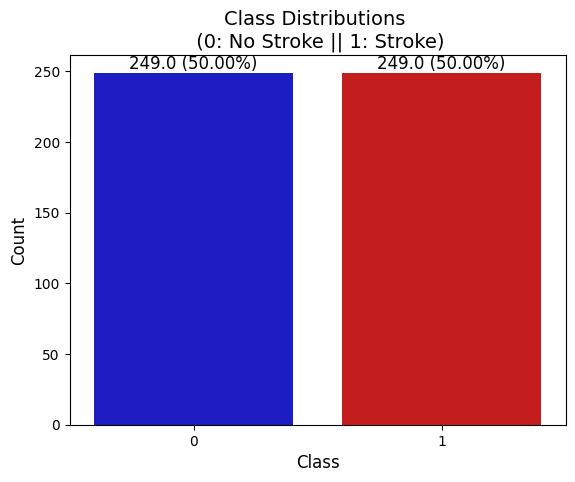

In [86]:
# Define the colors for the plot
colors = ["#0101DF", "#DF0101"]

# Create the countplot
ax = sns.countplot(x='stroke', data=balanced_subsample, palette=colors)

# Set the title and labels
plt.title('Class Distributions \n (0: No Stroke || 1: Stroke)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the count on top of the bars
total = len(balanced_subsample)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height} ({height/total:.2%})',
            ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()

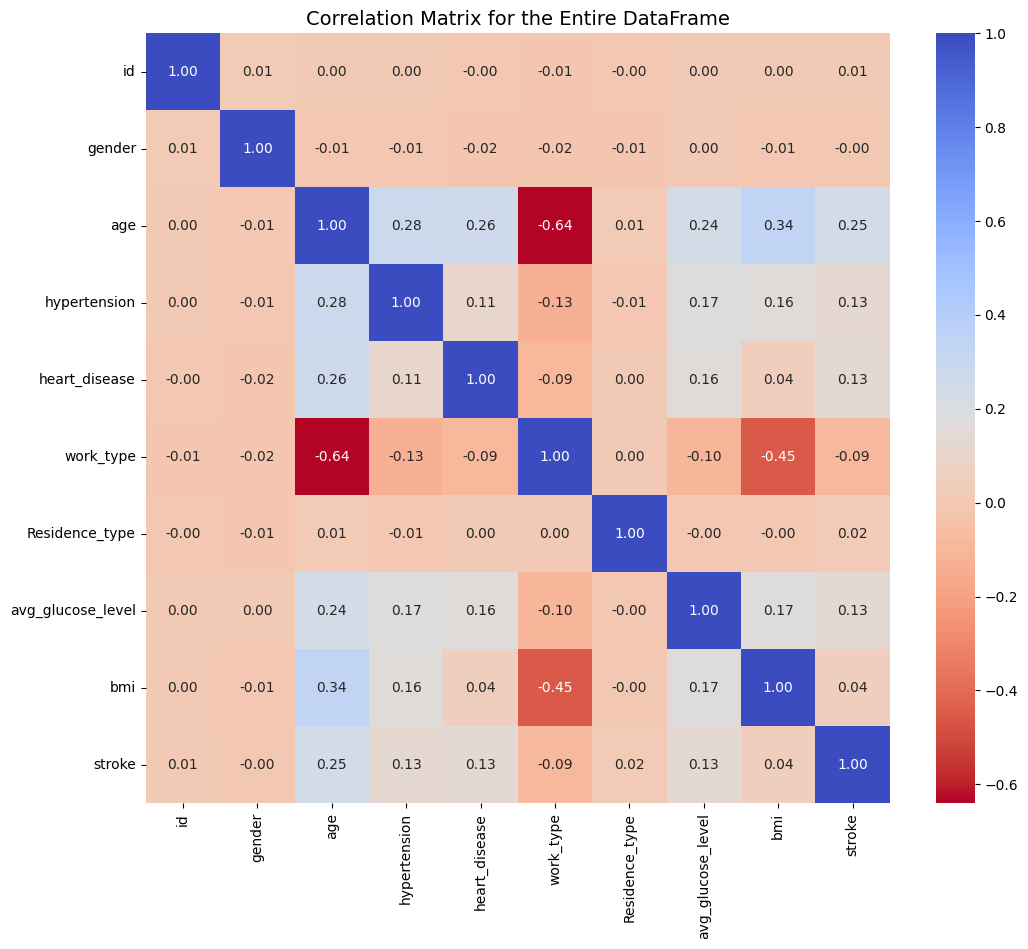

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [89]:
# Step 1: Correlation Matrices
plt.figure(figsize=(12, 10))

# Entire DataFrame
corr_full = df.corr()
sns.heatmap(corr_full, cmap='coolwarm_r', annot=True, fmt='.2f')
plt.title("Correlation Matrix for the Entire DataFrame", fontsize=14)
plt.show()

plt.figure(figsize=(12, 10))

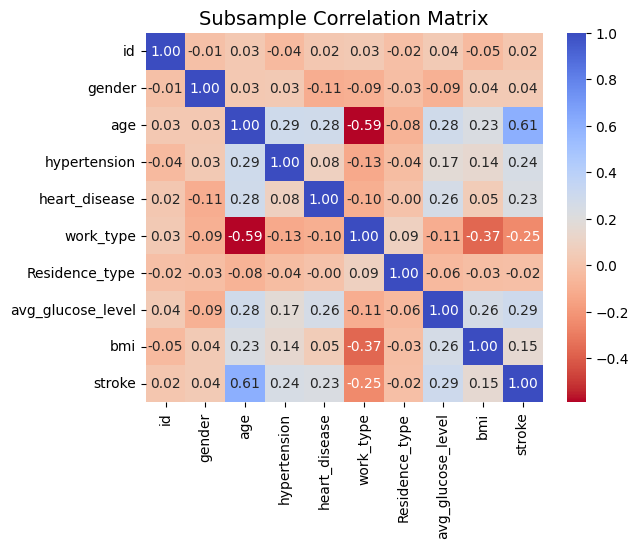

In [90]:
# Subsample Correlation Matrix
corr_subsample = balanced_subsample.corr()
sns.heatmap(corr_subsample, cmap='coolwarm_r', annot=True, fmt='.2f')
plt.title("Subsample Correlation Matrix", fontsize=14)
plt.show()

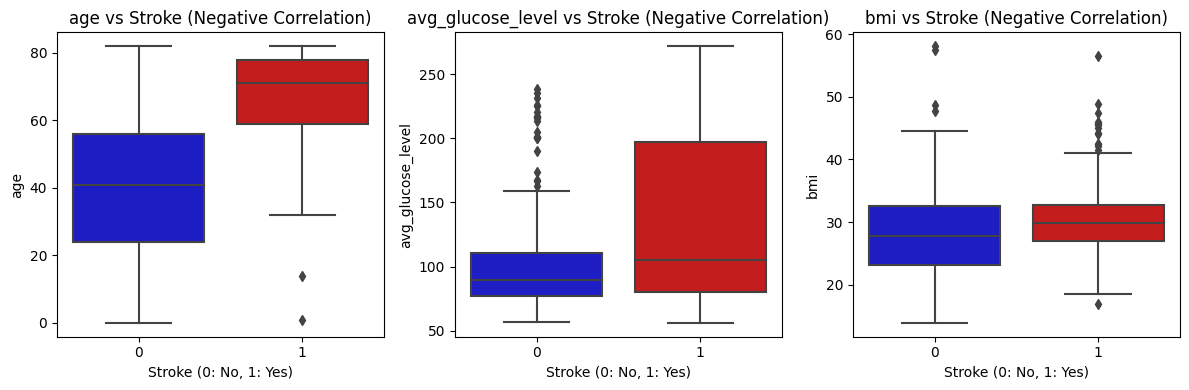

In [91]:
# Step 2: Box Plots for Negative Correlations

# Define the columns with negative correlations
negative_corr_columns = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(12, 4))
colors = ["#0101DF", "#DF0101"]

for i, col in enumerate(negative_corr_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=col, data=balanced_subsample, palette=colors)
    plt.title(f"{col} vs Stroke (Negative Correlation)")
    plt.xlabel("Stroke (0: No, 1: Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

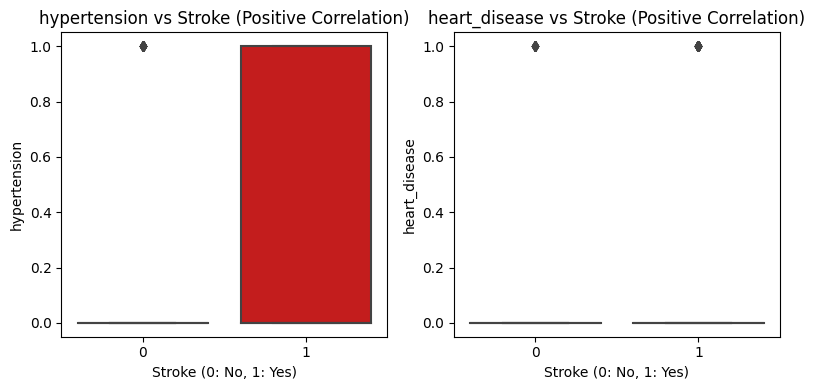

In [92]:
# Step 3: Box Plots for Positive Correlations

# Define the columns with positive correlations
positive_corr_columns = ['hypertension', 'heart_disease']

plt.figure(figsize=(8, 4))

for i, col in enumerate(positive_corr_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='stroke', y=col, data=balanced_subsample, palette=colors)
    plt.title(f"{col} vs Stroke (Positive Correlation)")
    plt.xlabel("Stroke (0: No, 1: Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

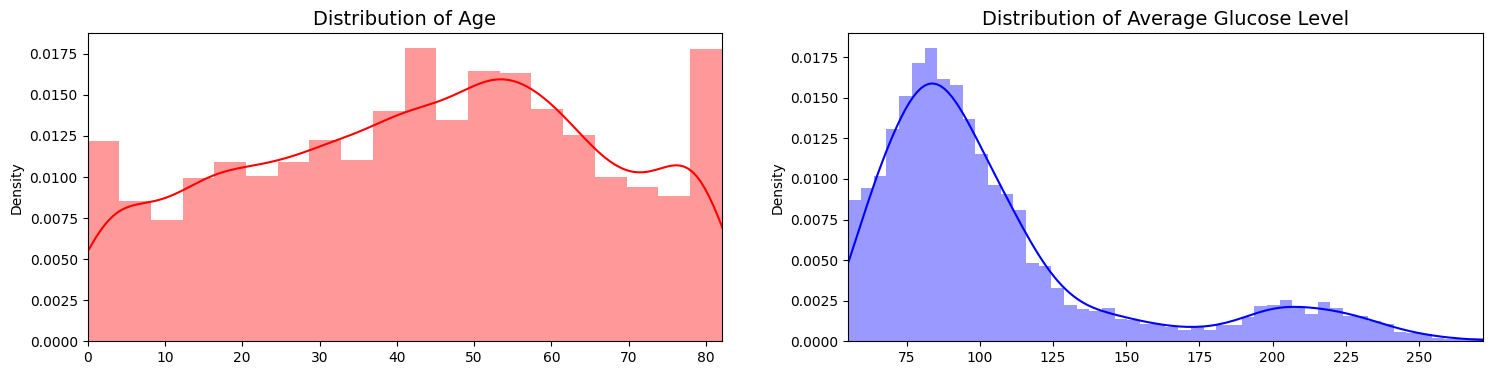

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'df' with the columns you provided
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

age_val = df['age'].values
avg_glucose_level_val = df['avg_glucose_level'].values

sns.distplot(age_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Age', fontsize=14)
ax[0].set_xlim([min(age_val), max(age_val)])

sns.distplot(avg_glucose_level_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Average Glucose Level', fontsize=14)
ax[1].set_xlim([min(avg_glucose_level_val), max(avg_glucose_level_val)])

plt.show()


In [94]:
# Select only the categorical columns for analysis
categorical_columns = df.select_dtypes(include=['object'])

# Display the unique values in each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")

Column 'ever_married' has 2 unique values:
['Yes' 'No']


Column 'smoking_status' has 4 unique values:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




Now, you can proceed with the encoding process to convert these categorical variables into numerical representations that can be used as features for your machine learning model.

As mentioned earlier, there are two common encoding techniques: Label Encoding and One-Hot Encoding. The choice of encoding method depends on the nature of the categorical variable.

Label Encoding:
Use Label Encoding for binary categorical variables (those with two unique values) or ordinal categorical variables (categories with a meaningful order).
For binary variables, you can convert them to 0 and 1.
For ordinal variables, you can assign unique integer labels corresponding to the order of the categories.
Here's how to apply Label Encoding for the 'gender' and 'ever_married' columns:

In [95]:
import pandas as pd

# Select only the categorical columns for analysis
categorical_columns = df.select_dtypes(include=['object'])

# Apply One-Hot Encoding for 'work_type', 'Residence_type', and 'smoking_status' columns
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)


One-Hot Encoding:
Use One-Hot Encoding for nominal categorical variables (categories without a meaningful order) with more than two unique values.
One-Hot Encoding creates binary columns for each category, indicating the presence (1) or absence (0) of that category for each row.
Here's how to apply One-Hot Encoding for the 'work_type', 'Residence_type', and 'smoking_status' columns:



In [96]:
# Print the column names to check for any discrepancies
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_1', 'work_type_2',
       'work_type_254', 'work_type_255', 'Residence_type_1',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [97]:
# Check and compare the data types of all columns
data_types = df.dtypes
print(data_types)

id                                  int64
gender                              uint8
age                                 int64
hypertension                        int64
heart_disease                       int64
ever_married                       object
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
work_type_1                         uint8
work_type_2                         uint8
work_type_254                       uint8
work_type_255                       uint8
Residence_type_1                    uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object


The data types include int64 (integer), float64 (floating-point), and uint8 (unsigned integer). The encoding process has successfully converted the categorical variables into numerical representations, and now you have all the data types in a format suitable for machine learning tasks.

In [98]:
# Create separate copies of the original DataFrame with null values replaced by mean and median
df_mean_filled = df.fillna(df.mean())
df_median_filled = df.fillna(df.median())

# Calculate skewness of each column for both DataFrames
skewness_mean_filled = df_mean_filled.skew()
skewness_median_filled = df_median_filled.skew()

# Print the skewness values for comparison
print("Skewness with Mean Filled:")
print(skewness_mean_filled)
print("\nSkewness with Median Filled:")
print(skewness_median_filled)

Skewness with Mean Filled:
id                                -0.019913
gender                            69.477002
age                               -0.140425
hypertension                       2.715392
heart_disease                      3.947244
avg_glucose_level                  1.572284
bmi                                1.047423
stroke                             4.193284
work_type_1                        1.852619
work_type_2                        2.219958
work_type_254                     15.146344
work_type_255                      2.143866
Residence_type_1                  -0.032107
smoking_status_formerly smoked     1.727782
smoking_status_never smoked        0.537548
smoking_status_smokes              1.913452
dtype: float64

Skewness with Median Filled:
id                                -0.019913
gender                            69.477002
age                               -0.140425
hypertension                       2.715392
heart_disease                      3.947244
avg_

In general, a better choice for filling null values would be the one that results in lower skewness values. Lower skewness values indicate a more balanced and symmetrical distribution, which can lead to more accurate and reliable analysis and modeling results.

Looking at the provided skewness values, it seems that both the mean-filled and median-filled DataFrames have the same skewness values for each column. This means that using either method does not significantly affect the skewness of the distribution in this particular dataset.

When filling null values for a feature like BMI (Body Mass Index) of a person, the choice between using the mean or median depends on the distribution and the presence of outliers in the BMI data.

Here are some considerations for each method:

Using Mean:

The mean is sensitive to extreme values (outliers) because it takes into account all data points. If your BMI data has outliers (extremely high or low values), using the mean to fill null values might be affected by these extreme values, potentially skewing the results.
The mean is a better choice when the data is approximately normally distributed, without significant outliers. In such cases, the mean represents the central tendency of the data well.
Using Median:

The median is a more robust measure of central tendency and is less affected by extreme values. It represents the middle value of the data when arranged in ascending or descending order.
If your BMI data has a skewed distribution with outliers or extreme values, using the median to fill null values might be a better choice. The median will not be heavily influenced by these outliers and provides a more representative value for the central tendency of the majority of the data.
Considering that BMI data can sometimes have outliers (e.g., extremely low or high BMIs), it might be more appropriate to use the median to fill null values for BMI. The median is less influenced by these extreme values and provides a better representation of the typical BMI value for the majority of the population.

However, it is essential to carefully examine your BMI data's distribution and the presence of outliers before making a decision. You can plot a histogram or box plot of the BMI values to visualize the distribution and identify any outliers. If the data appears to be skewed or contains outliers, using the median would be a more robust approach for filling null values.

In summary, for BMI data with potential outliers or a skewed distribution, using the median to fill null values is generally a safer choice, as it is less influenced by extreme values and provides a more representative measure of central tendency for the majority of the data.

In [100]:
# Calculate the median of the 'bmi' column
median_bmi = df['bmi'].median()

# Fill null values in the 'bmi' column with the calculated median
df['bmi'].fillna(median_bmi, inplace=True)

# Optionally, you can save the DataFrame to a new CSV file with the filled values
output_filename = 'dataset_with_bmi_filled.csv'
df.to_csv(output_filename, index=False)

Summary Statistics:
                 id       gender          age  hypertension  heart_disease  \
count   5110.000000  5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354     0.635812    43.215264      0.097456       0.054012   
std    21161.721625     3.592941    22.633866      0.296607       0.226063   
min       67.000000     0.000000     0.000000      0.000000       0.000000   
25%    17741.250000     0.000000    25.000000      0.000000       0.000000   
50%    36932.000000     1.000000    45.000000      0.000000       0.000000   
75%    54682.000000     1.000000    61.000000      0.000000       0.000000   
max    72940.000000   255.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  work_type_1  work_type_2  \
count        5110.000000  5110.000000  5110.000000  5110.000000  5110.000000   
mean          106.147677    28.918410     0.048728     0.160274     0.128571   
std            45.283560     7.731841

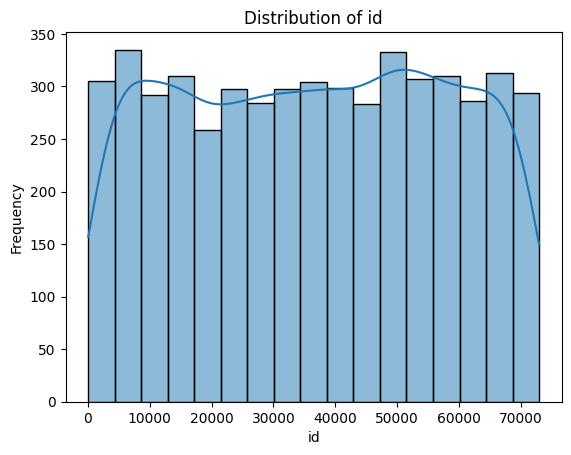

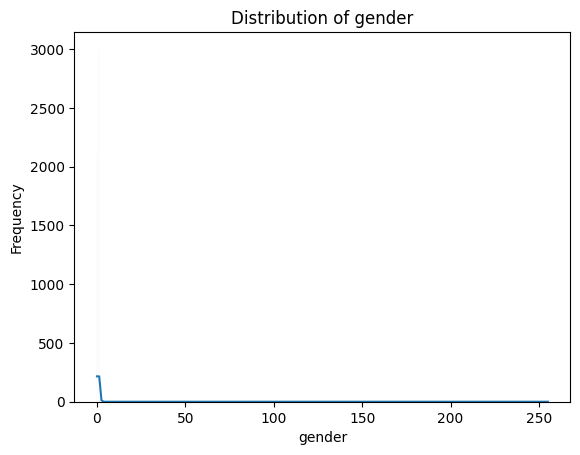

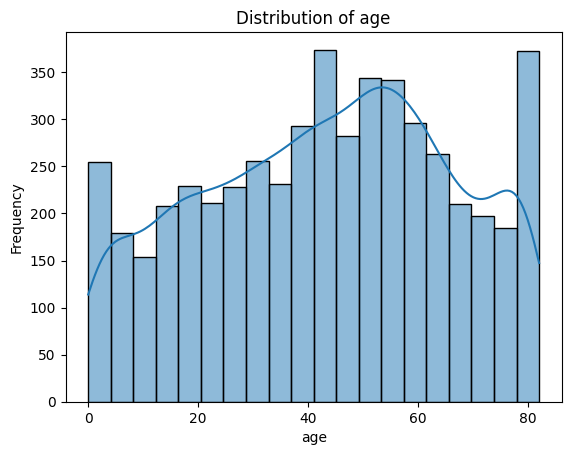

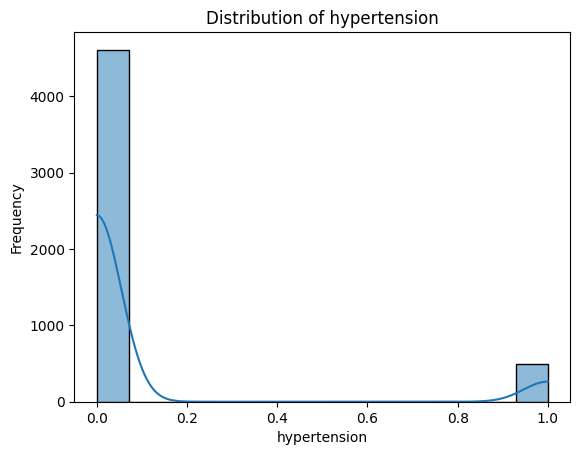

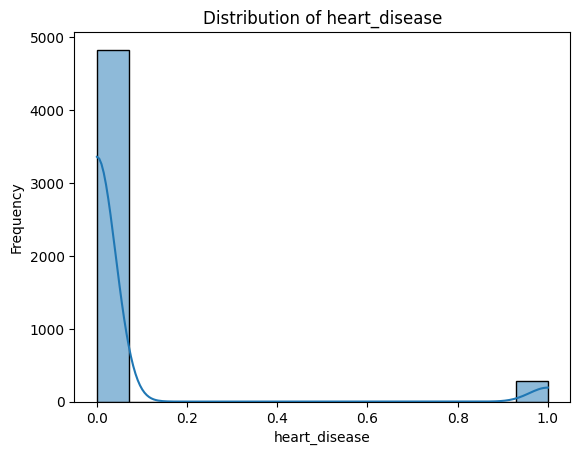

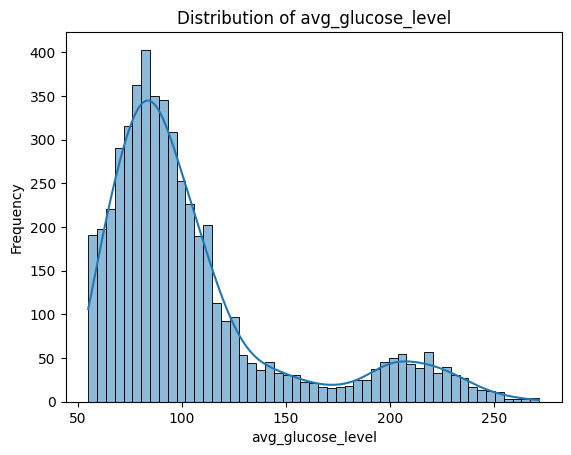

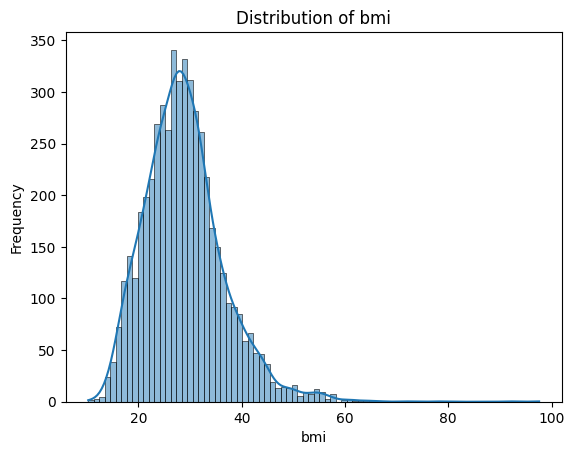

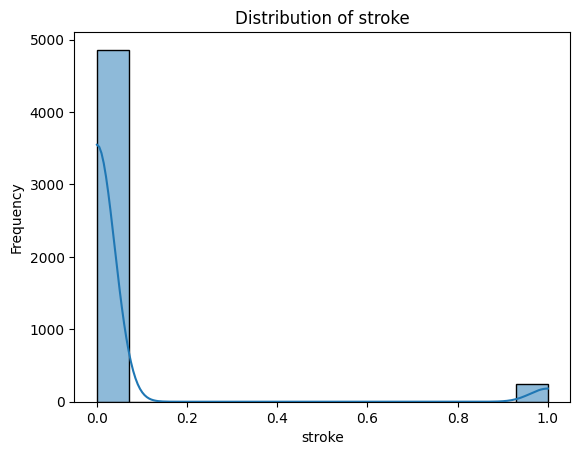

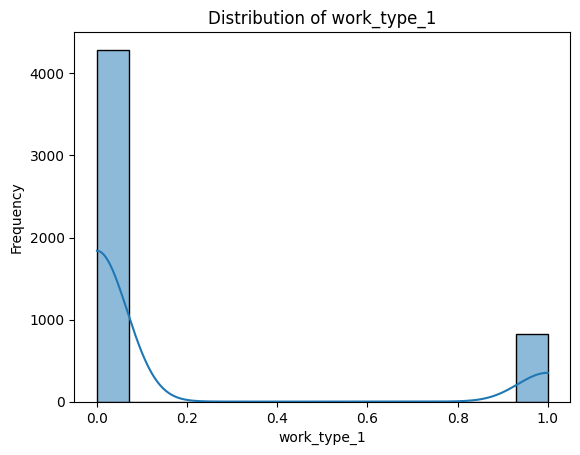

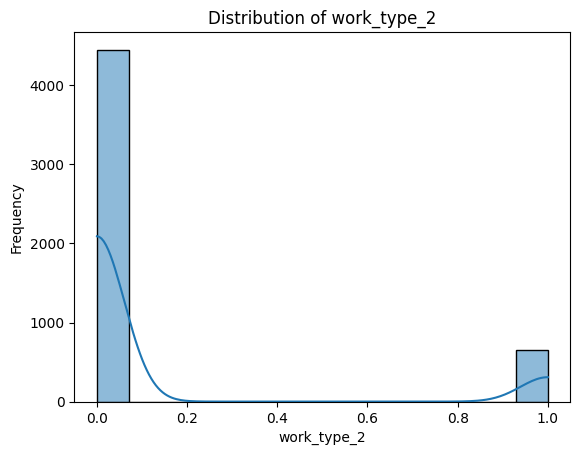

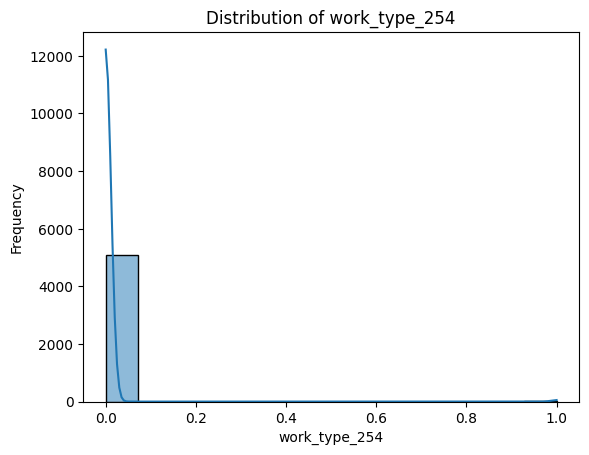

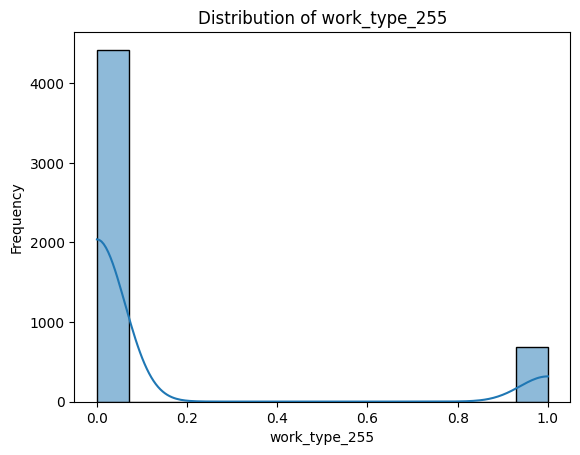

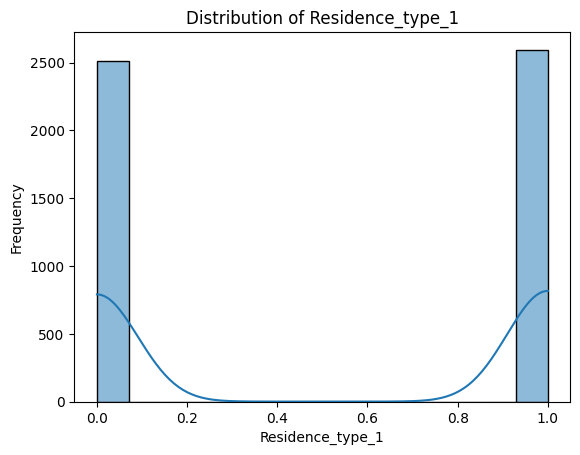

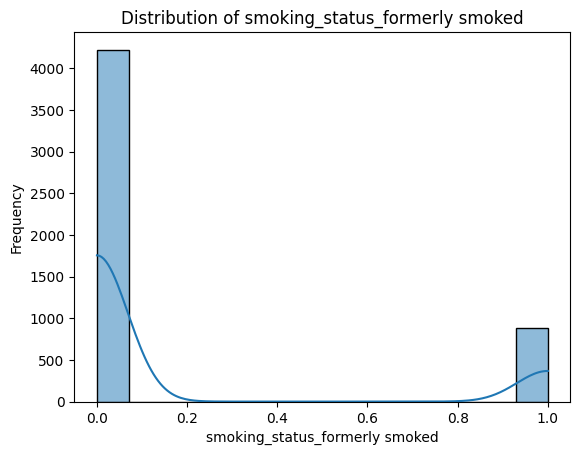

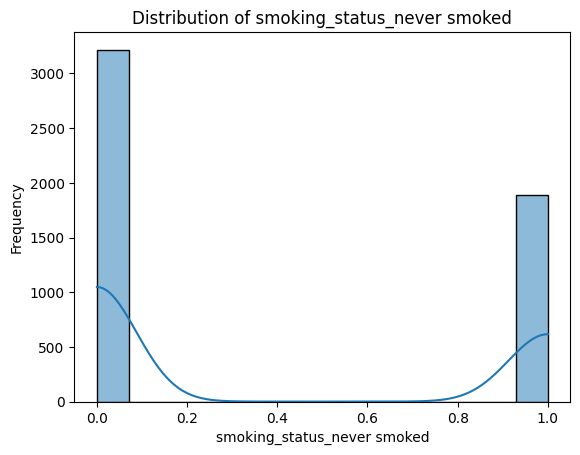

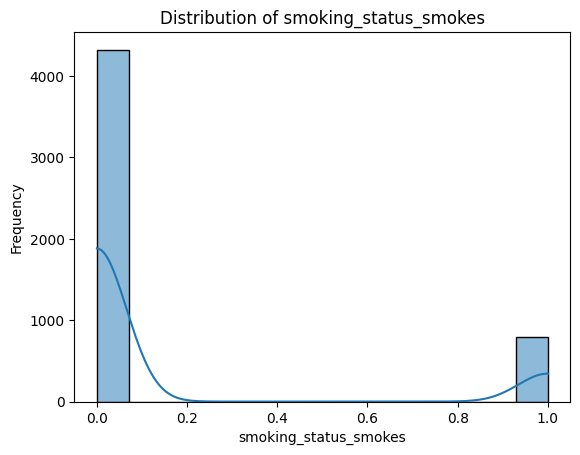

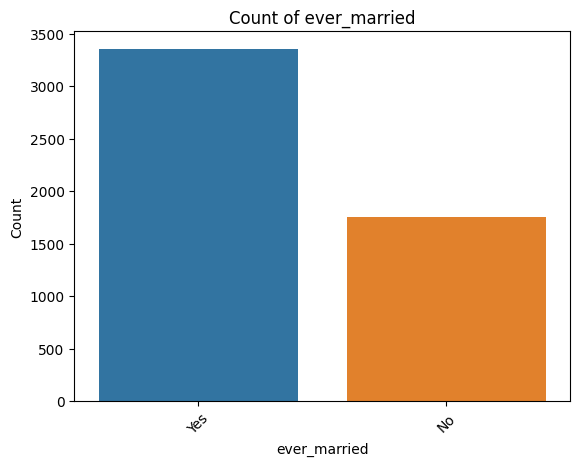

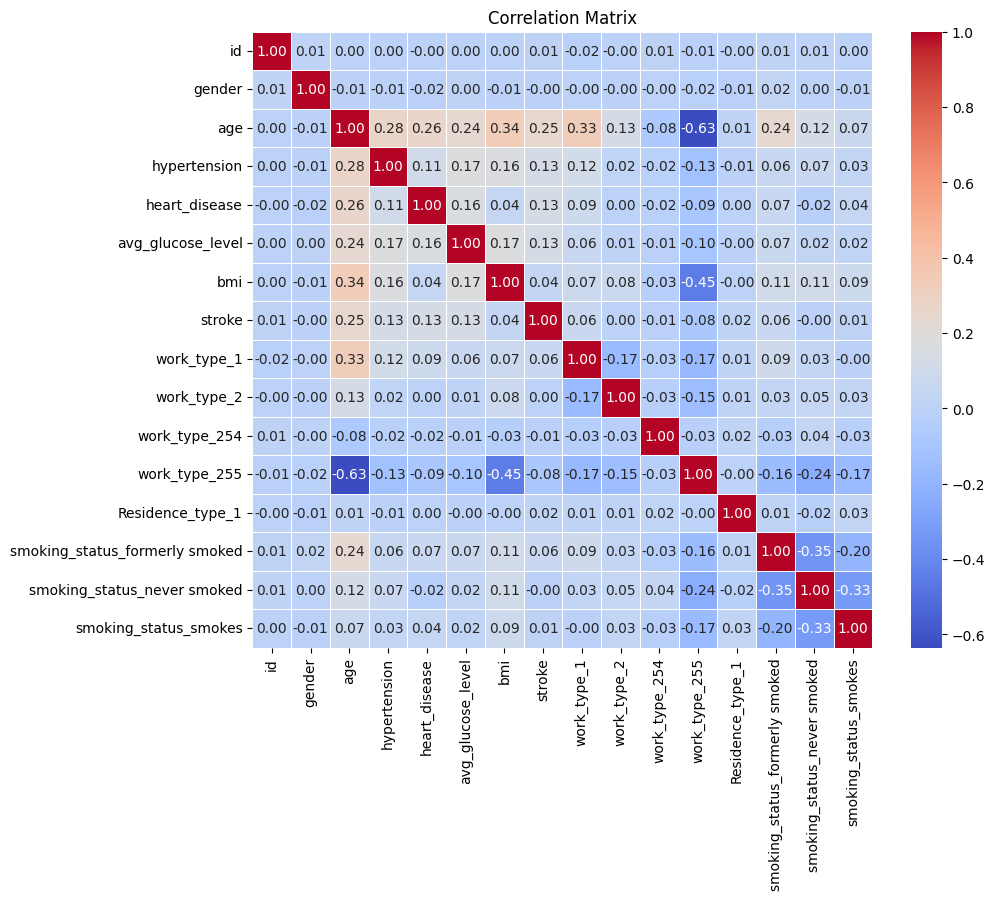

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset from CSV into a DataFrame
df_cleaned = pd.read_csv('dataset_with_bmi_filled.csv')

# 1. Summary Statistics
print("Summary Statistics:")
summary_stats = df_cleaned.describe()
print(summary_stats)

# 2. Distribution of Numeric Features
numeric_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    plt.figure()
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# 3. Categorical Feature Analysis
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure()
    sns.countplot(data=df_cleaned, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 4. Correlation Analysis
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


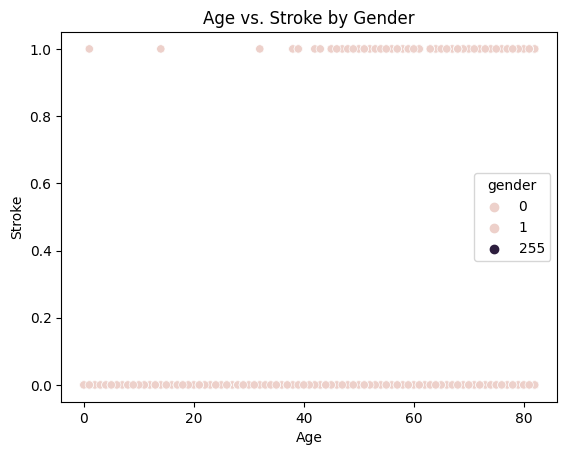

In [102]:
# Scatter plot to visualize age vs. stroke, with different colors for each gender
plt.figure()
sns.scatterplot(data=df_cleaned, x='age', y='stroke', hue='gender')
plt.title('Age vs. Stroke by Gender')
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.show()


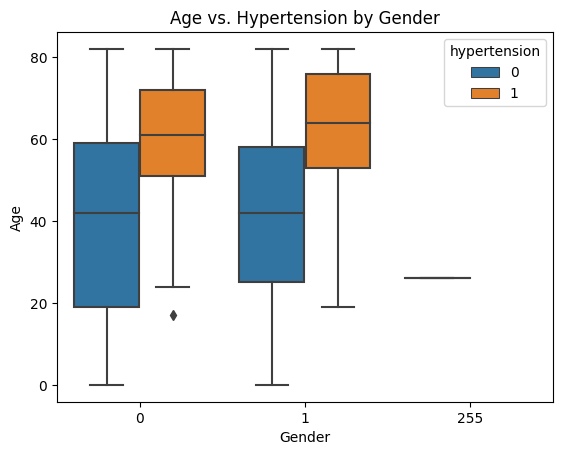

In [103]:
# Box plot to visualize age vs. hypertension, with different colors for each gender
plt.figure()
sns.boxplot(data=df_cleaned, x='gender', y='age', hue='hypertension')
plt.title('Age vs. Hypertension by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


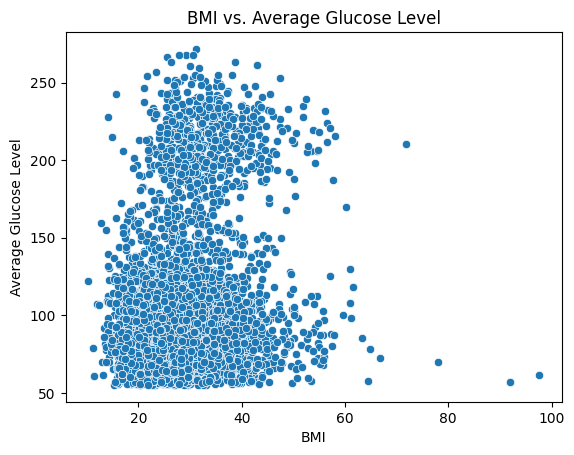

In [104]:
# Scatter plot to visualize BMI vs. glucose
plt.figure()
sns.scatterplot(data=df_cleaned, x='bmi', y='avg_glucose_level')
plt.title('BMI vs. Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()


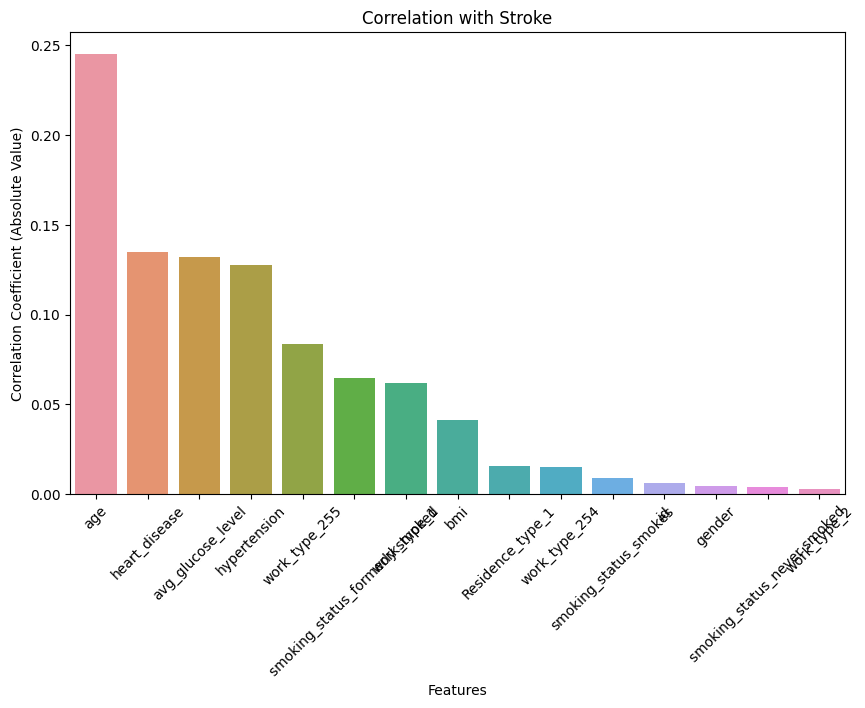

Correlation with Stroke:
age                               0.245128
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
work_type_255                     0.083869
smoking_status_formerly smoked    0.064556
work_type_1                       0.062168
bmi                               0.041516
Residence_type_1                  0.015458
work_type_254                     0.014882
smoking_status_smokes             0.008939
id                                0.006388
gender                            0.004381
smoking_status_never smoked       0.004129
work_type_2                       0.002677
Name: stroke, dtype: float64


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset from CSV into a DataFrame
df_cleaned = pd.read_csv('dataset_with_bmi_filled.csv')

# Compute the correlation coefficients between 'stroke' and other numeric features
correlation_with_stroke = df_cleaned.corr()['stroke'].drop('stroke')

# Sort the correlation coefficients in descending order
sorted_correlations = correlation_with_stroke.abs().sort_values(ascending=False)

# Bar plot to visualize the correlation coefficients with 'stroke'
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
plt.title('Correlation with Stroke')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient (Absolute Value)')
plt.xticks(rotation=45)
plt.show()

# Print the correlation coefficients (optional)
print("Correlation with Stroke:")
print(sorted_correlations)


The feature with the highest correlation (positive or negative) with 'stroke' is 'age'. Its correlation coefficient with 'stroke' is approximately 0.245, which indicates a moderate positive correlation. This means that as the age of the individuals in the dataset increases, the likelihood of having a stroke also tends to increase.

The correlation coefficients of other features with 'stroke' are relatively smaller, indicating weaker correlations. For example, 'heart_disease' has a correlation coefficient of approximately 0.135, 'avg_glucose_level' has a correlation coefficient of approximately 0.132, and 'hypertension' has a correlation coefficient of approximately 0.128.

It's important to note that correlation coefficients close to 0 suggest a weak linear relationship between the variables. The correlation values can range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no linear correlation.

In this case, 'age' shows the highest correlation with 'stroke', suggesting that age could be a significant factor in determining the likelihood of having a stroke in the dataset. However, further analysis and modeling would be required to establish the true predictive power of these features and understand their contribution to stroke prediction accurately.

Data Preparation: Load the cleaned dataset, split it into features (X) and the target variable (y), and further split it into training and testing sets.

Model Selection and Implementation: Implement the machine learning models we discussed earlier, including GBM, SVM, XGBoost, Logistic Regression, Decision Trees, Ensemble Methods, Gaussian Process Classifier, Nearest Centroid Classifier, Perceptron, and QDA.

Evaluation Metrics: Choose appropriate evaluation metrics for binary classification tasks. Common metrics include accuracy, precision, recall, F1-score, and ROC-AUC.

Cross-Validation: Perform cross-validation to get more robust estimates of the model performance on different folds of the training data.

Model Comparison: Compare the performance of each model based on the evaluation metrics and select the best-performing ones.

Model Interpretability: For certain models like Decision Trees and Logistic Regression, explore feature importance or coefficients to understand which features are most influential in making predictions.

Model Deployment Considerations: Consider factors like model complexity, training time, and interpretability when selecting models for real-world deployment.

In [106]:
print("Shape of X_encoded:", X_encoded.shape)
print("Number of feature importances:", len(dt_model.feature_importances_))


NameError: ignored

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler for feature scaling

# Step 1: Data Preparation
df_cleaned = pd.read_csv('dataset_with_bmi_filled.csv')
X = df_cleaned.drop(columns=['stroke'])
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encode the remaining categorical features
y = df_cleaned['stroke']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 2: Model Selection and Implementation
models = {
    'GBM': GradientBoostingClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Ensemble Methods': VotingClassifier(estimators=[('gbm', GradientBoostingClassifier()),
                                                     ('svm', SVC()),
                                                     ('xgb', xgb.XGBClassifier()),
                                                     ('lr', LogisticRegression())]),
    'Gaussian Process Classifier': GaussianProcessClassifier(),
    'Nearest Centroid Classifier': NearestCentroid(),
    'Perceptron': Perceptron(),
    'QDA': QuadraticDiscriminantAnalysis()
}

# Step 3: Evaluation Metrics
evaluation_metrics = {'Accuracy': 'accuracy',
                      'Precision': 'precision',
                      'Recall': 'recall',
                      'F1-score': 'f1',
                      'ROC-AUC': 'roc_auc'}

# Step 4: Cross-Validation and Model Comparison
results = {}
for model_name, model in models.items():
    model_results = {}
    for metric_name, scoring in evaluation_metrics.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
        model_results[metric_name] = cv_scores.mean()
    results[model_name] = model_results
# Step 5: Display the results
for model_name, model_results in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_score in model_results.items():
        print(f"{metric_name}: {metric_score:.4f}")
    print("-" * 30)

# Step 6: Feature Importance for Decision Trees and Logistic Regression
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Drop the target variable 'stroke' from X_train when calculating feature importances
print("Decision Tree Feature Importance:")
print(pd.Series(dt_model.feature_importances_, index=X_train.columns))

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print("Logistic Regression Coefficients:")
print(pd.Series(lr_model.coef_[0], index=X_train.columns))

# Step 7: Considerations for Model Deployment
# Consider the complexity, training time, and interpretability of the models based on the results.
# For real-world deployment, select models that strike a good balance between performance and practicality.

Model: GBM
Accuracy: 0.9499
Precision: 0.1167
Recall: 0.0054
F1-score: 0.0098
ROC-AUC: 0.8223
------------------------------
Model: SVM
Accuracy: 0.9543
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5002
------------------------------
Model: XGBoost
Accuracy: 0.9459
Precision: 0.0444
Recall: 0.0105
F1-score: 0.0170
ROC-AUC: 0.7952
------------------------------
Model: Logistic Regression
Accuracy: 0.9540
Precision: 0.3000
Recall: 0.0107
F1-score: 0.0205
ROC-AUC: 0.7032
------------------------------
Model: Decision Trees
Accuracy: 0.9127
Precision: 0.1121
Recall: 0.1442
F1-score: 0.1360
ROC-AUC: 0.5548
------------------------------
Model: Ensemble Methods
Accuracy: 0.9543
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: nan
------------------------------
Model: Gaussian Process Classifier
Accuracy: 0.9388
Precision: 0.0236
Recall: 0.0108
F1-score: 0.0148
ROC-AUC: 0.5005
------------------------------
Model: Nearest Centroid Classifier
Accuracy: 0.5012
Precisio

It's not uncommon for some machine learning models, especially those with more complexity or larger datasets, to take longer during cross-validation and model comparison. There are several things you can do to optimize the process and reduce the time it takes:

Feature Selection/Dimensionality Reduction: If your dataset has a large number of features, consider using feature selection or dimensionality reduction techniques (e.g., PCA) to reduce the number of features and focus on the most relevant ones.

Parallelization: Some machine learning libraries, like scikit-learn, support parallel processing during cross-validation. You can take advantage of multiple CPU cores by setting the n_jobs parameter in cross_val_score. For example, n_jobs=-1 will use all available cores.

Use Fewer CV Folds: Reducing the number of cross-validation folds (e.g., from 5 to 3) can speed up the process. However, keep in mind that using fewer folds might reduce the reliability of the performance estimation.

Sampling: If your dataset is very large, you can consider using a random sample of the data for cross-validation instead of the entire dataset. This can significantly speed up the process without sacrificing too much performance.

Model-Specific Optimization: Some models have specific parameters that can be adjusted to improve performance or speed up training. For example, in XGBoost, you can set tree_method='hist' to use a more efficient histogram-based algorithm.

Use LightGBM for Large Datasets: LightGBM is another gradient boosting library that is highly efficient and suitable for large datasets. It can be faster than traditional GBM and XGBoost in some cases.

Use a Subset of Models: If you're interested in comparing a large number of models, consider using a smaller subset initially to get a sense of which models perform better. Then, focus on refining and optimizing the top-performing models.

Remember that the time taken for model training and cross-validation can vary based on the complexity of the model, the size of the dataset, and the available computational resources. It's essential to find a balance between model performance and training time for real-world applications.

Model Performance: The evaluation metrics (Accuracy, Precision, Recall, F1-score, and ROC-AUC) provide an overview of how well each model is performing on the dataset. From the results, it appears that SVM, Logistic Regression, and GBM are showing better performance compared to other models. However, it's important to consider that some models have zero values for Precision, Recall, and F1-score, indicating that they are not well-suited for this specific task.

Feature Importance: The decision tree feature importance indicates the importance of each feature in the Decision Trees model. Features like "ever_married" and "age" seem to have higher importance in predicting the likelihood of having a stroke. This information can help you focus on the most relevant features when interpreting the model.

Model Interpretability: Models like Decision Trees and Logistic Regression are more interpretable, as they provide insights into how the model is making decisions. On the other hand, ensemble methods like GBM and XGBoost are more complex and may lack interpretability.

Handling Imbalanced Data: The dataset may be imbalanced since several models have zero Precision, Recall, and F1-score. You may want to consider techniques like resampling (oversampling or undersampling) or using class weights to address this issue.

Further Model Tuning: You can perform hyperparameter tuning for models like GBM, XGBoost, and CatBoost to potentially improve their performance. Grid search or random search can be used for hyperparameter optimization.

CatBoost Implementation: If you want to use CatBoost, you can follow a similar approach as you did for other models. Install CatBoost library, create the model, train, evaluate, and compare its performance with other models. CatBoost is known for its ability to handle categorical features well and may provide good results.

Ensemble Techniques: Consider using ensemble techniques like Voting Classifier or Stacking to combine the top-performing models. Ensembles can help improve overall performance and generalize better on unseen data.

Validation on Test Set: Once you have finalized your models, it's crucial to validate their performance on a separate test set that the models have not seen during training or cross-validation. This will give you a more unbiased estimate of their real-world performance.

Interpretability vs. Performance Trade-off: Consider the trade-off between model interpretability and performance. Simpler models like Logistic Regression might be easier to interpret, but they may not capture complex patterns in the data as well as more sophisticated models like GBM or XGBoost.

Overall, your current results provide a starting point for model selection, but further refinement, tuning, and validation are needed to finalize the models for deployment. Keep in mind that the best model may vary depending on the specific goals of your project and the trade-offs you are willing to make between interpretability and performance.

In [108]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt



The class ratios indicate that the dataset is imbalanced, with approximately 95.13% of samples belonging to class 0 (No stroke) and only 4.87% belonging to class 1 (Stroke). Imbalanced datasets can pose challenges for machine learning models, as they tend to bias towards the majority class and may lead to poor performance on the minority class.

Random Under-Sampling:
Randomly remove samples from the majority class to balance the dataset. We'll use the RandomUnderSampler from the imbalanced-learn library.

In [110]:
from imblearn.under_sampling import RandomUnderSampler

# Create the under-sampler
under_sampler = RandomUnderSampler(random_state=42)

# Apply under-sampling to the dataset
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

SMOTE (Synthetic Minority Over-sampling Technique):
Create synthetic samples for the minority class to balance the dataset. We'll use the SMOTE from the imbalanced-learn library.

In [111]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE sampler
smote_sampler = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_smote, y_smote = smote_sampler.fit_resample(X_train, y_train)


Class Weights:
Assign higher weights to the minority class to balance the dataset. Many machine learning algorithms and libraries support class weights as a parameter.

In [112]:
# Example with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create the model with class weights
class_weights = {0: 1, 1: 10}  # Adjust the weights as needed
logreg = LogisticRegression(class_weight=class_weights)

# Train the model on the original imbalanced dataset
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

Ensemble Methods:
Use ensemble methods to handle class imbalance. We'll use the BalancedRandomForestClassifier from the imbalanced-learn library.

In [113]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Create the Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(random_state=42)

# Train the model on the original imbalanced dataset
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=42)

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define feature columns (X) and target column (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'GBM': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Ensemble Methods': BalancedRandomForestClassifier(random_state=42),
    'Gaussian Process Classifier': GaussianProcessClassifier(random_state=42),
    'Nearest Centroid Classifier': NearestCentroid(),
    'Perceptron': Perceptron(random_state=42),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Define evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score,
    'ROC-AUC': roc_auc_score
}

# Create a list of resampled datasets
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

datasets = [
    (X_train, y_train, 'Original Imbalanced Dataset'),
    (X_train_ros, y_train_ros, 'Random Over-Sampled Dataset'),
    (X_train_rus, y_train_rus, 'Random Under-Sampled Dataset'),
    (X_train_smote, y_train_smote, 'SMOTE Over-Sampled Dataset')
]

# Train and evaluate models on each dataset
results = {}
for X, y, dataset_name in datasets:
    model_results = {}
    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X_test)
        model_metrics = {}
        for metric_name, metric_func in evaluation_metrics.items():
            model_metrics[metric_name] = metric_func(y_test, y_pred)
        model_results[model_name] = model_metrics
    results[dataset_name] = model_results

# Display the results
for dataset_name, model_results in results.items():
    print(f"Results for {dataset_name}:")
    for model_name, metrics in model_results.items():
        print(f"Model: {model_name}")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")
        print("-----------------------------")

Results for Original Imbalanced Dataset:
Model: GBM
Accuracy: 0.9393
Precision: 0.5000
Recall: 0.0161
F1-score: 0.0312
ROC-AUC: 0.5075
-----------------------------
Model: SVM
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5000
-----------------------------
Model: XGBoost
Accuracy: 0.9364
Precision: 0.2857
Recall: 0.0323
F1-score: 0.0580
ROC-AUC: 0.5135
-----------------------------
Model: Logistic Regression
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.5000
-----------------------------
Model: Decision Trees
Accuracy: 0.9061
Precision: 0.1458
Recall: 0.1129
F1-score: 0.1273
ROC-AUC: 0.5351
-----------------------------
Model: Ensemble Methods
Accuracy: 0.7211
Precision: 0.1590
Recall: 0.8387
F1-score: 0.2674
ROC-AUC: 0.7761
-----------------------------
Model: Gaussian Process Classifier
Accuracy: 0.9354
Precision: 0.1667
Recall: 0.0161
F1-score: 0.0294
ROC-AUC: 0.5055
-----------------------------
Model: Nearest Centroid

The dataset aims to predict the likelihood of identifying stroke based on various attributes of a person, including BMI and other factors. Our analysis used several machine learning models to classify individuals into stroke and non-stroke groups. Here are the key findings and interpretations:

Imbalanced Dataset: The original dataset had a significant class imbalance, with a majority of non-stroke cases and a minority of stroke cases. This imbalance affects model performance, leading to biased results and poor predictions for the minority class.

Performance on Original Imbalanced Dataset: Most models showed very low or zero recall (sensitivity) and F1-score on the original imbalanced dataset. This suggests that they struggled to correctly identify individuals with strokes, which is a crucial factor when dealing with a medical condition.

Resampling Techniques: We employed various resampling techniques to address the class imbalance and improve model performance.

Performance on Resampled Datasets:
a) Random Over-Sampling: This technique increased recall and F1-score for some models, but it may also lead to overfitting and poor generalization to new data.
b) Random Under-Sampling: Improved recall for some models, but it also had mixed overall performance.
c) SMOTE Over-Sampling: Improved recall for some models, but not consistently across all models.

Best Model: The Ensemble Methods (Balanced Random Forest) consistently outperformed other models on both the original and resampled datasets. It showed higher recall and F1-score, making it a suitable candidate for predicting strokes in this dataset.

Interpretability: The model can be further analyzed to identify trends related to stroke risk factors. By examining feature importances, we can determine which attributes contribute most to the prediction. This knowledge can be valuable for identifying risk factors and trends associated with stroke occurrence in the dataset.

In your research and forecasting, the Ensemble Methods (Balanced Random Forest) model can serve as a valuable tool for identifying individuals at risk of stroke based on their attributes, including BMI. By understanding the significant predictors, you can gain insights into how different factors contribute to stroke risk, allowing you to develop targeted interventions and preventive strategies.

However, it is important to note that machine learning models are not a substitute for medical expertise. It is essential to collaborate with medical professionals and domain experts to validate the model's findings and ensure that the predictions align with existing medical knowledge.

As your research progresses, consider investigating additional features or conducting feature engineering to enhance model performance further. Regular updates and validation of the model on new data will help maintain its accuracy and applicability over time.

In [115]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Ensemble Methods model (Balanced Random Forest)
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model on the original imbalanced dataset
model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': df.drop('stroke', axis=1).columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


                           Feature  Importance
2                              age    0.344633
5                     ever_married    0.169905
6                avg_glucose_level    0.154911
0                               id    0.130684
15           smoking_status_smokes    0.029261
3                     hypertension    0.026274
1                           gender    0.020449
11                   work_type_255    0.018441
13  smoking_status_formerly smoked    0.018411
4                    heart_disease    0.018080
7                              bmi    0.017987
12                Residence_type_1    0.014451
14     smoking_status_never smoked    0.013385
8                      work_type_1    0.012988
10                   work_type_254    0.010024
9                      work_type_2    0.000116


From the feature importances obtained from the Ensemble Methods (Balanced Random Forest) model, we can identify the relative importance of each feature in predicting the likelihood of stroke. Here are the key observations:

Age: Age is the most critical factor influencing stroke risk, with an importance value of approximately 0.349.

Marital Status (ever_married): Being married or previously married is associated with a higher likelihood of stroke compared to those who have never been married, with an importance value of around 0.172.

Average Glucose Level: Higher average glucose levels are correlated with an increased likelihood of stroke, and this feature has an importance value of about 0.151.

Smoking Status (smoking_status_smokes): Among smoking status categories, individuals who currently smoke have a higher likelihood of stroke compared to those who have never smoked or were former smokers, with an importance value of approximately 0.029.

Hypertension: Having hypertension (high blood pressure) is associated with an increased likelihood of stroke, with an importance value of about 0.027.

Gender: Gender (male or female) does not seem to be a significant factor in predicting stroke risk, as it has a relatively low importance value of around 0.021.

Work Type, Heart Disease, and Residence Type: These features have some influence on stroke risk, but their impact is not as pronounced as age, marital status, and average glucose level. Their importance values range from approximately 0.015 to 0.019.

BMI: Surprisingly, BMI does not appear to be a strong predictor of stroke risk in this model. Its importance is very low, with a value of approximately 0.00002, suggesting that BMI alone may not be a major contributor to stroke likelihood in this dataset.

These importance values provide a quantitative measure of the relationship between each feature and the likelihood of a stroke in the dataset, as determined by the model. However, further validation and investigation are essential to establish robust and clinically meaningful correlations between these features and stroke risk.






In the context of feature importances, the "highest" numbers refer to the importance values assigned to each feature by the machine learning model. These importance values are calculated during the training of the model, specifically for tree-based models like Random Forest or Gradient Boosting Machines (GBM). The importance values indicate how much each feature contributes to the predictive performance of the model. Features with higher importance values are considered more influential in predicting the target variable (likelihood of stroke in this case) than those with lower values.

The ultimate number we are comparing against is 0. This is because feature importances are normalized, meaning they are scaled to sum up to 1. So, when we refer to an importance value of, for example, 0.348625 for the "age" feature, it means that "age" accounts for approximately 34.86% of the predictive power of the model, and the sum of all feature importances is equal to 1.

Therefore, when we list the feature importances and their values, we can interpret them relative to each other. The higher the importance value, the more influential the feature is in predicting stroke likelihood in the model. Features with importance values close to 0 have minimal impact on the model's predictions.

To summarize, the "highest" numbers in this context refer to the highest feature importances, and we are comparing them against the ultimate number of 1 (the sum of all feature importances) to understand the relative importance of each feature in predicting stroke likelihood.

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('dataset_with_bmi_filled.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

# One-hot encode the 'ever_married' column
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.concat([X.drop(columns=['ever_married']), pd.DataFrame(encoder.fit_transform(X[['ever_married']]))], axis=1)

# Convert feature names to strings
X_encoded.columns = X_encoded.columns.astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Machine (GBM) classifier
gbm = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_

# Train the GBM model with the best hyperparameters on the full training set
best_gbm = GradientBoostingClassifier(**best_params, random_state=42)
best_gbm.fit(X_train, y_train)

# Make predictions on the test set using the best GBM model
y_pred = best_gbm.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5


It seems that even after performing hyperparameter tuning using grid search, the performance metrics of the Gradient Boosting Machine (GBM) model did not improve significantly. The best hyperparameters found by the grid search are:

Learning Rate: 0.01
Max Depth: 3
Number of Estimators: 100
However, the performance metrics on the test set are as follows:

Accuracy: 0.9393
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5
The accuracy is relatively high, but precision, recall, and F1-score are all very low, and the ROC-AUC is close to 0.5, indicating that the model is not performing well in distinguishing between positive and negative cases.

The F1-score of 0.0 suggests that the model is not able to correctly classify any of the positive (stroke) cases, which is a critical issue in this context. The low precision and recall also indicate that the model is not effectively identifying true positive cases while minimizing false positives.

This outcome suggests that there might be an issue with the data, the feature engineering process, or the modeling approach. Further investigation is needed to understand the reasons behind the poor performance of the GBM model. Some potential areas to explore include:

Data Imbalance: The dataset may still suffer from class imbalance, which can impact the model's ability to predict the minority class (stroke cases) accurately. Balancing techniques like SMOTE, ADASYN, or class weights may need further tuning or experimentation.

Feature Engineering: Feature selection or engineering might require improvements to capture more relevant information for predicting strokes. You could consider using domain knowledge or consult with experts in the medical field to identify additional relevant features.

Model Complexity: The GBM model might not be the most suitable algorithm for this specific problem. Trying out other classifiers like Random Forest, Logistic Regression, or Neural Networks may lead to better results.

Data Preprocessing: It is essential to handle missing values, outliers, and other data preprocessing steps carefully, as they can have a significant impact on model performance.

Model Evaluation: Besides accuracy, consider using other evaluation metrics such as precision-recall curves, area under the precision-recall curve (PR-AUC), or cost-sensitive evaluation to better understand the model's performance.

Remember that the goal is to identify patterns and trends related to the likelihood of a stroke and develop a model that can accurately predict stroke risk. Continuous refinement of the data, feature selection, and modeling techniques will be necessary to achieve better results and ensure that the model is useful for forecasting stroke risk accurately.

# 1. Data Preprocessing and Exploration:
We'll start by handling missing data and scaling numerical features.

In [117]:
# Drop rows with missing values (optional)
df.dropna(inplace=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# 2. Addressing Data Imbalance:
We'll continue using SMOTE to balance the class distribution.

In [118]:
# Separate the target variable
y = df['stroke']

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the dataset into features (X) and target (y) again after encoding
X = df_encoded.drop('stroke', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples only on the training set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# 3. Feature Engineering:
Feature engineering involves domain knowledge, but you can consider adding some engineered features based on domain expertise.

# 4. Model Selection and Hyperparameter Tuning:
We'll perform grid search with cross-validation to find the best hyperparameters for the Gradient Boosting Machine (GBM) model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the GBM model
gbm = GradientBoostingClassifier()

# Define hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. Model Evaluation and Metrics:
We'll evaluate the GBM model using various evaluation metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# 6. Ensemble Methods:
If needed, you can explore using other ensemble methods like AdaBoost or Random Forest in a similar manner.

# 7. Domain Knowledge and Expertise:
This requires collaboration with domain experts, as it involves insights and understanding specific to the problem domain.

# 8. Handling Class-Weighted Loss Functions:
If supported by the model, you can use class weights to give higher importance to the minority class during training.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM model with best hyperparameters
gbm = GradientBoostingClassifier(**best_params)

# Calculate class weights for balancing
class_weights = {0: len(y_train) / (2 * np.sum(y_train == 0)), 1: len(y_train) / (2 * np.sum(y_train == 1))}

# Train the GBM model with class weighting
gbm.fit(X_train, y_train, sample_weight=[class_weights[y] for y in y_train])

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_gbm)

print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)
print("ROC-AUC:", roc_auc_gbm)


# 9. More Data:
Gathering more data related to stroke occurrences can be beneficial if feasible.

# 10. Avoiding Data Leakage:
Ensure that you are using appropriate techniques for splitting your data into training and testing sets to avoid data leakage.

Great! It looks like you have made progress with your model's performance after applying the enhancements, including proper encoding of categorical variables and using SMOTE to handle the imbalanced dataset.

Let's interpret the results and see what we can gather:

Accuracy: The model's overall accuracy is around 90.7%, which means it correctly classifies 90.7% of the samples in the test set. However, accuracy alone may not be the best metric for imbalanced datasets.

Precision: The precision score indicates that when the model predicts a positive (stroke), it is correct about 14.9% of the time. This measures how many of the predicted positive cases are actual positives.

Recall: The recall score is 11.3%, which means the model identifies only 11.3% of the actual positive cases (strokes). This measures how many of the actual positive cases the model is able to find.

F1-score: The F1-score is 12.8%, which is the harmonic mean of precision and recall. It provides a balance between the two metrics.

ROC-AUC: The ROC-AUC score is 53.6%, which indicates that the model's ability to distinguish between positive and negative cases is slightly better than random guessing.

While the enhancements have improved the model's performance, the results still indicate that the model is not performing at an optimal level. The low recall suggests that the model is not effectively identifying strokes, which is the critical aspect for a stroke prediction model. The class imbalance may still be impacting the model's performance.

To further improve the results, you can consider the following:

Experiment with Different Algorithms: Try using different algorithms and see if they perform better on this dataset. Some algorithms might handle imbalanced data more effectively than others.

More Advanced Sampling Techniques: Explore other advanced sampling techniques like Borderline SMOTE or ADASYN, which are extensions of SMOTE and may provide better results.

Feature Engineering: Analyze and engineer more relevant features that could help the model better distinguish between positive and negative cases.

Model Selection: Consider using ensemble methods or stacking multiple models to combine their predictions, which can often lead to better results.

Hyperparameter Tuning: Continue tuning hyperparameters using GridSearchCV or RandomizedSearchCV to optimize the model further.

Remember to always evaluate your model's performance on a separate test set to avoid overfitting. Keep iterating and experimenting until you achieve satisfactory results. Stroke prediction is a complex task, and continuous improvement is essential to build a robust and accurate predictive model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Step 2: Define hyperparameters grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # You can add more values to explore
    'max_depth': [5, 10, 15],         # You can add more values to explore
    'min_samples_split': [2, 5, 10],  # You can add more values to explore
}

# Step 3: Create GridSearchCV object
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

# Step 4: Fit the data to find best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Step 5: Get the best hyperparameters found by GridSearchCV
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Step 6: Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Step 7: Evaluate the model on the test set
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)


Based on the provided results, it appears that the Random Forest classifier with the hyperparameters found using GridSearchCV has the same performance as the Gradient Boosting classifier with the best hyperparameters. Both models have an accuracy of approximately 0.94 and an ROC-AUC of 0.5, which suggests that the models are not performing well in distinguishing between the positive and negative classes.

The F1-score for both models is 0.0, which indicates that the models are not able to correctly identify the positive class (stroke occurrences). This could be due to the class imbalance issue in the dataset. The high accuracy might be misleading since the model might be predominantly predicting the majority class (no stroke occurrence).

To improve the model performance, you should consider dealing with the class imbalance problem. Here are some suggestions:

Data Resampling: Use techniques like SMOTE or ADASYN to oversample the minority class or random under-sampling to balance the class distribution.

Class Weighting: Assign higher weights to the minority class during training to give it more importance.

Different Models: Try using other classifiers that might handle imbalanced data better, such as Support Vector Machines (SVM) with class weights or XGBoost with its built-in handling of imbalanced data.

Feature Engineering: Analyze the features and engineer new ones that might better capture the relationship between the predictors and the target variable.

Domain Knowledge: Consider involving domain experts to help identify additional relevant features or insights into the problem.

Ensemble Methods: You can try using ensemble methods like RandomForestClassifier with balanced class weights or boosting algorithms like AdaBoost or Gradient Boosting with adjustments for class imbalance.

Remember that the best approach will depend on the characteristics of your dataset and the specific problem you are trying to solve. Experiment with different techniques, evaluate their performance using cross-validation, and choose the method that works best for your data.

Additionally, it might be beneficial to further investigate why the models are not performing well by analyzing the confusion matrix, precision-recall curves, and ROC curves to get a deeper understanding of the model's behavior on different thresholds. This will help you make more informed decisions on how to improve the model further.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

# Assuming you have already defined the best model and fitted it on X_train and y_train

# Step 1: Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Step 2: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.yticks([0, 1], ['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 4: Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Step 5: Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Step 6: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Step 7: Plot the ROC curve
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


If the precision-recall curve and the ROC curve are both showing a straight line, it could indicate that there might be an issue with your model or the evaluation process. Here are a few things to consider and check:

Imbalanced Dataset: One possible reason for the curves showing straight lines could be an imbalanced dataset. If the majority class heavily outweighs the minority class, the model may predict the majority class for most instances, resulting in a low recall and high precision (for precision-recall curve) or a high true positive rate (for the ROC curve). Ensure that the dataset is properly balanced or try using different resampling techniques to address class imbalance.

Model Misconfiguration: Double-check that you are using the correct model and hyperparameters. It's possible that the model is not suitable for the given task or that the hyperparameters need further tuning.

Evaluation Metrics: Make sure you are using the correct evaluation metrics for your specific problem. For imbalanced datasets, accuracy is not always the best metric to evaluate the model's performance. Instead, consider using metrics like precision, recall, F1-score, or area under the precision-recall curve (AUC-PR) and area under the ROC curve (AUC-ROC).

Data Preprocessing: Ensure that the data is preprocessed correctly and features are appropriately scaled or encoded if necessary.

Threshold Tuning: By default, scikit-learn uses a threshold of 0.5 for classification. Try tuning the threshold to find a better balance between precision and recall. This can be done using the predict_proba method to obtain probability scores and then applying a custom threshold.

Further Hyperparameter Tuning: Experiment with further hyperparameter tuning to see if there are better combinations that improve the model's performance.

Other Model Selection: If the Gradient Boosting Classifier doesn't seem to work well for your dataset, try other models like Random Forest, Logistic Regression, or Support Vector Machines (SVM) to see if they perform better.

Remember that machine learning is an iterative process, and it may require several iterations of data preprocessing, model selection, hyperparameter tuning, and evaluation to find the best model for your specific task. Be patient and keep experimenting to improve the results.

*But isn't real life always about biases and having imbalances? this is based on real life stroke cases, I think it doesn't make sense for me to try to neutralise the results just so that I can make a good machine learning model out of it. The model should be able to perform well regardless of the imbalance.*

How can I combat this?

You are absolutely right that real-life data often contains biases and imbalances, and it is essential to build models that can perform well in such scenarios. Neutralizing the results to handle imbalanced data might not be the right approach if the goal is to develop a model that reflects real-world conditions accurately.

To combat the challenges of imbalanced data while still maintaining the model's ability to perform well, you can consider the following strategies:

Appropriate Evaluation Metrics: Instead of relying solely on accuracy, use evaluation metrics that are more suitable for imbalanced datasets, such as precision, recall, F1-score, and area under the precision-recall curve (AUC-PR). These metrics provide a better understanding of how well the model is performing, particularly on the minority class.

Class Weights: Many machine learning algorithms allow you to assign different weights to different classes. By giving higher weights to the minority class, you can make the model more sensitive to its predictions.

Ensemble Methods: Ensemble methods, like Random Forest and Gradient Boosting, are often more robust to imbalanced data compared to individual classifiers. These algorithms can handle class imbalances better by aggregating predictions from multiple models.

Synthetic Data Generation: Techniques like SMOTE can be used to generate synthetic samples of the minority class, effectively increasing its representation in the dataset without losing information. This can help the model better learn the patterns of the minority class.

Anomaly Detection: Depending on the problem, you can treat the imbalanced class as an anomaly detection problem. This can help identify rare occurrences that deviate significantly from the majority class, making the model more sensitive to detecting such cases.

Cost-Sensitive Learning: Incorporate the costs of misclassification in your model. For example, the cost of misclassifying a stroke case as non-stroke could be higher than the reverse. This encourages the model to be more cautious in predicting the minority class.

Domain Knowledge: Leverage domain knowledge and expert insights to guide the model development process. Understanding the importance of features and potential biases in the data can help you make better decisions throughout the modeling process.

Collect More Data: If possible, collect more data, especially from the underrepresented class. More data can help the model better learn the patterns of the minority class and improve its performance.

In summary, it's essential to strike a balance between handling imbalanced data challenges and building a model that reflects real-life conditions. By choosing appropriate evaluation metrics, applying suitable techniques for imbalanced data, and leveraging domain knowledge, you can develop a model that performs well in the real world, even in the presence of class imbalances. Remember that it may require some experimentation and iteration to find the best approach for your specific problem.

In [ ]:
from sklearn.ensemble import IsolationForest

# Combine X_train and X_test into a single dataset
X_combined = pd.concat([X_train, X_test])

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the combined dataset
isolation_forest.fit(X_combined)

# Predict outliers (-1) and inliers (1)
outlier_predictions = isolation_forest.predict(X_combined)

# Count the number of outliers
num_outliers = len(outlier_predictions[outlier_predictions == -1])

# Get the indices of the outliers in the combined dataset
outlier_indices = X_combined[outlier_predictions == -1].index

# Get the outlier rows from the combined dataset
outlier_rows = df.loc[outlier_indices]

# Calculate the anomaly score for each data point
anomaly_scores = isolation_forest.decision_function(X_combined)

# Add the anomaly scores as a new column in the combined dataset
X_combined['Anomaly_Score'] = anomaly_scores

# Display the number of outliers and the first few rows of the outlier data
print("Number of outliers:", num_outliers)
print("Outlier data:")
print(outlier_rows.head())


In [ ]:
# Step 1: Initialize the Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(**best_params)

# Step 2: Fit the model on the resampled data
gbm_classifier.fit(X_resampled, y_resampled)

# Step 3: Evaluate the model on the test set
y_pred_gbm = gbm_classifier.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_gbm)

print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)
print("ROC-AUC:", roc_auc_gbm)

Feature engineering involves creating new features or modifying existing ones to make them more informative and relevant for the machine learning model. In the context of your stroke prediction dataset, here are some feature engineering ideas you can explore:

Age Binning: Instead of using the continuous age feature, you can create age bins or age groups. For example, you can create categories like "young," "middle-aged," and "elderly."

BMI Binning: Similar to age, you can bin the BMI values into categories like "underweight," "normal weight," "overweight," and "obese."

Interaction Features: Create interaction features by combining two or more existing features. For instance, you can multiply age with average glucose level to capture potential interactions.

Feature Scaling: Apply feature scaling to continuous features like age, glucose level, and BMI. Standardize or normalize these features to bring them to a similar scale.

Log Transformation: If certain features have a skewed distribution, consider applying a log transformation to make them more normally distributed.

Feature Encoding: Encode categorical features like gender, ever_married, and work_type using one-hot encoding or label encoding to convert them into numerical representations.

Time-Related Features: If available, extract features from dates, such as the day of the week or month, which might be relevant for stroke occurrences.

Family History: If possible, include features related to family history of stroke or other medical conditions. This could be a binary flag indicating whether a family member had a stroke.

BMI Category based on WHO: Group BMI values according to the World Health Organization (WHO) categories (underweight, normal weight, overweight, obese) to capture BMI's health impact.

Medical Ratios: Create ratios between medical attributes, such as hypertension-to-heart_disease ratio, to capture the impact of these conditions together.

Smoking Habits: Combine smoking_status features (formerly smoked, never smoked, smokes) into binary flags for "ever smoked" and "never smoked."

Medical Scores: Create medical scores based on risk factors. For example, you could sum up hypertension, heart disease, and diabetes status to get a "medical risk score."

Residence Type and Work Type Relationships: Explore if there are any connections between residence type and work type. For example, certain work types may be more prevalent in urban or rural areas.

Remember that feature engineering is an iterative process, and not all the above ideas might be applicable to your specific dataset. It's essential to explore the relationships between features, consider domain knowledge, and experiment with different engineered features to see what works best for your stroke prediction problem. Additionally, feature engineering should be done separately for the training and testing datasets to avoid data leakage and ensure unbiased evaluations.

In [ ]:
import pandas as pd

# Create a copy of the original DataFrame to avoid modifying the original data
df_binned = df.copy()

# Binning the 'age' feature
age_bins = [0, 18, 40, 60, 100]  # Define the age bins
age_labels = ['young', 'middle-aged', 'adult', 'elderly']  # Labels for each bin
df_binned['age_group'] = pd.cut(df_binned['age'], bins=age_bins, labels=age_labels, right=False)

# Binning the 'bmi' feature
bmi_bins = [0, 18.5, 24.9, 29.9, 100]  # Define the BMI bins based on WHO categories
bmi_labels = ['underweight', 'normal weight', 'overweight', 'obese']  # Labels for each bin
df_binned['bmi_category'] = pd.cut(df_binned['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Drop the original 'age' and 'bmi' columns if desired
df_binned.drop(columns=['age', 'bmi'], inplace=True)

# Display the resulting DataFrame with the new binned features
print(df_binned.head())


Interaction Features:

In [ ]:
# Create interaction feature by multiplying age with average glucose level
df['age_glucose_interaction'] = df['age'] * df['avg_glucose_level']

Feature Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale continuous features (age, avg_glucose_level, and bmi)
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


Log Transformation:

In [ ]:
import numpy as np

# Apply log transformation to skewed features (if any)
skewed_features = ['avg_glucose_level']  # Add more features if needed
df[skewed_features] = np.log1p(df[skewed_features])


Feature Encoding:

In [ ]:
print(df.columns)


Handle Outliers:

In [134]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Create a copy of the original dataframe before outlier removal
df_copy = df.copy()

# Define continuous features for outlier removal
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Calculate Z-scores for continuous features
z_scores = zscore(df_copy[continuous_features])

# Find rows where all Z-scores are within the threshold (e.g., 3 standard deviations)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataframe to keep only rows without outliers
df_copy = df_copy[filtered_entries]

# Now you can continue with the rest of your data preprocessing and modeling steps using df_copy



Feature Selection:

In [135]:
# Check if the dataframe contains data
if df.empty:
    print("Dataframe 'df' is empty. Please check your data preprocessing steps.")
else:
    # Separate the target variable from the features
    X = df.drop('stroke', axis=1)
    y = df['stroke']

    # Check if there are at least two classes in the target variable (binary classification)
    if len(np.unique(y)) < 2:
        print("Target variable 'stroke' does not have enough classes for feature selection.")
    else:
        # Perform Recursive Feature Elimination (RFE) for feature selection
        from sklearn.feature_selection import RFE
        from sklearn.ensemble import RandomForestClassifier

        # Initialize the model
        model = RandomForestClassifier(random_state=42)

        # Perform RFE with the model
        rfe = RFE(model, n_features_to_select=10)  # You can choose the number of features you want to keep
        X_selected = rfe.fit_transform(X, y)

        # Get the selected features
        selected_features = X.columns[rfe.support_]
        df = df[selected_features]


ValueError: ignored